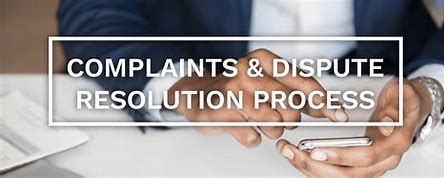

In [1]:
from IPython.display import Image
Image(filename='consumer image.jpg')

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from matplotlib import style
from wordcloud import WordCloud

# Clean Train DataSet

In [3]:
bd_train = pd.read_csv("Consumer_Complaints_train.csv")                                                      #read train dataset

In [4]:
bd_train.head()                                                                          #Displaying top 5 values in a dataframe

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [5]:
bd_train.shape                                                #The shape of an array is the number of elements in each dimension

(478421, 18)

In [6]:
bd_train.info()                                                                              #return information for a function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478421 entries, 0 to 478420
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 478421 non-null  object
 1   Product                       478421 non-null  object
 2   Sub-product                   339948 non-null  object
 3   Issue                         478421 non-null  object
 4   Sub-issue                     185796 non-null  object
 5   Consumer complaint narrative  75094 non-null   object
 6   Company public response       90392 non-null   object
 7   Company                       478421 non-null  object
 8   State                         474582 non-null  object
 9   ZIP code                      474573 non-null  object
 10  Tags                          67206 non-null   object
 11  Consumer consent provided?    135487 non-null  object
 12  Submitted via                 478421 non-null  object
 13 

In [7]:
df= bd_train.isnull().sum().sort_values(ascending=True)                  #count of null values for specific columns in dataframe

percent_1 = bd_train.isnull().sum()/bd_train.isnull().count()*100
percent_2 = round(percent_1 , 2).sort_values(ascending=True)

missing_values = pd.concat([df , percent_2] , axis=1 , keys=['Total' , '%'])
missing_values

,Total,%
Date received,0,0.00
Timely response?,0,0.00
Company response to consumer,0,0.00
Date sent to company,0,0.00
Submitted via,0,0.00
Consumer disputed?,0,0.00
Company,0,0.00
Complaint ID,0,0.00
Issue,0,0.00
Product,0,0.00


Large number of NaN values in many columns.

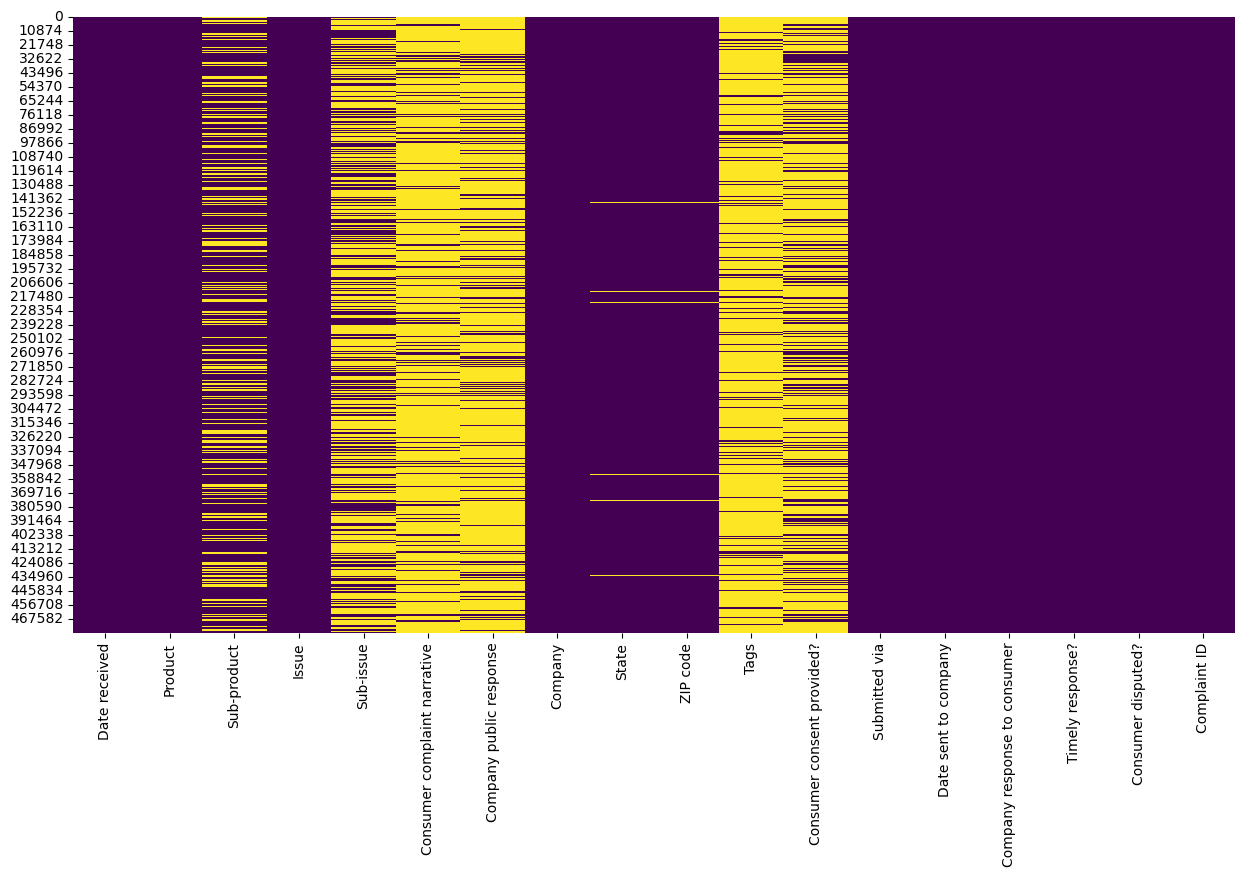

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(bd_train.isnull(),cbar=False,cmap="viridis")
plt.show()

<AxesSubplot:>

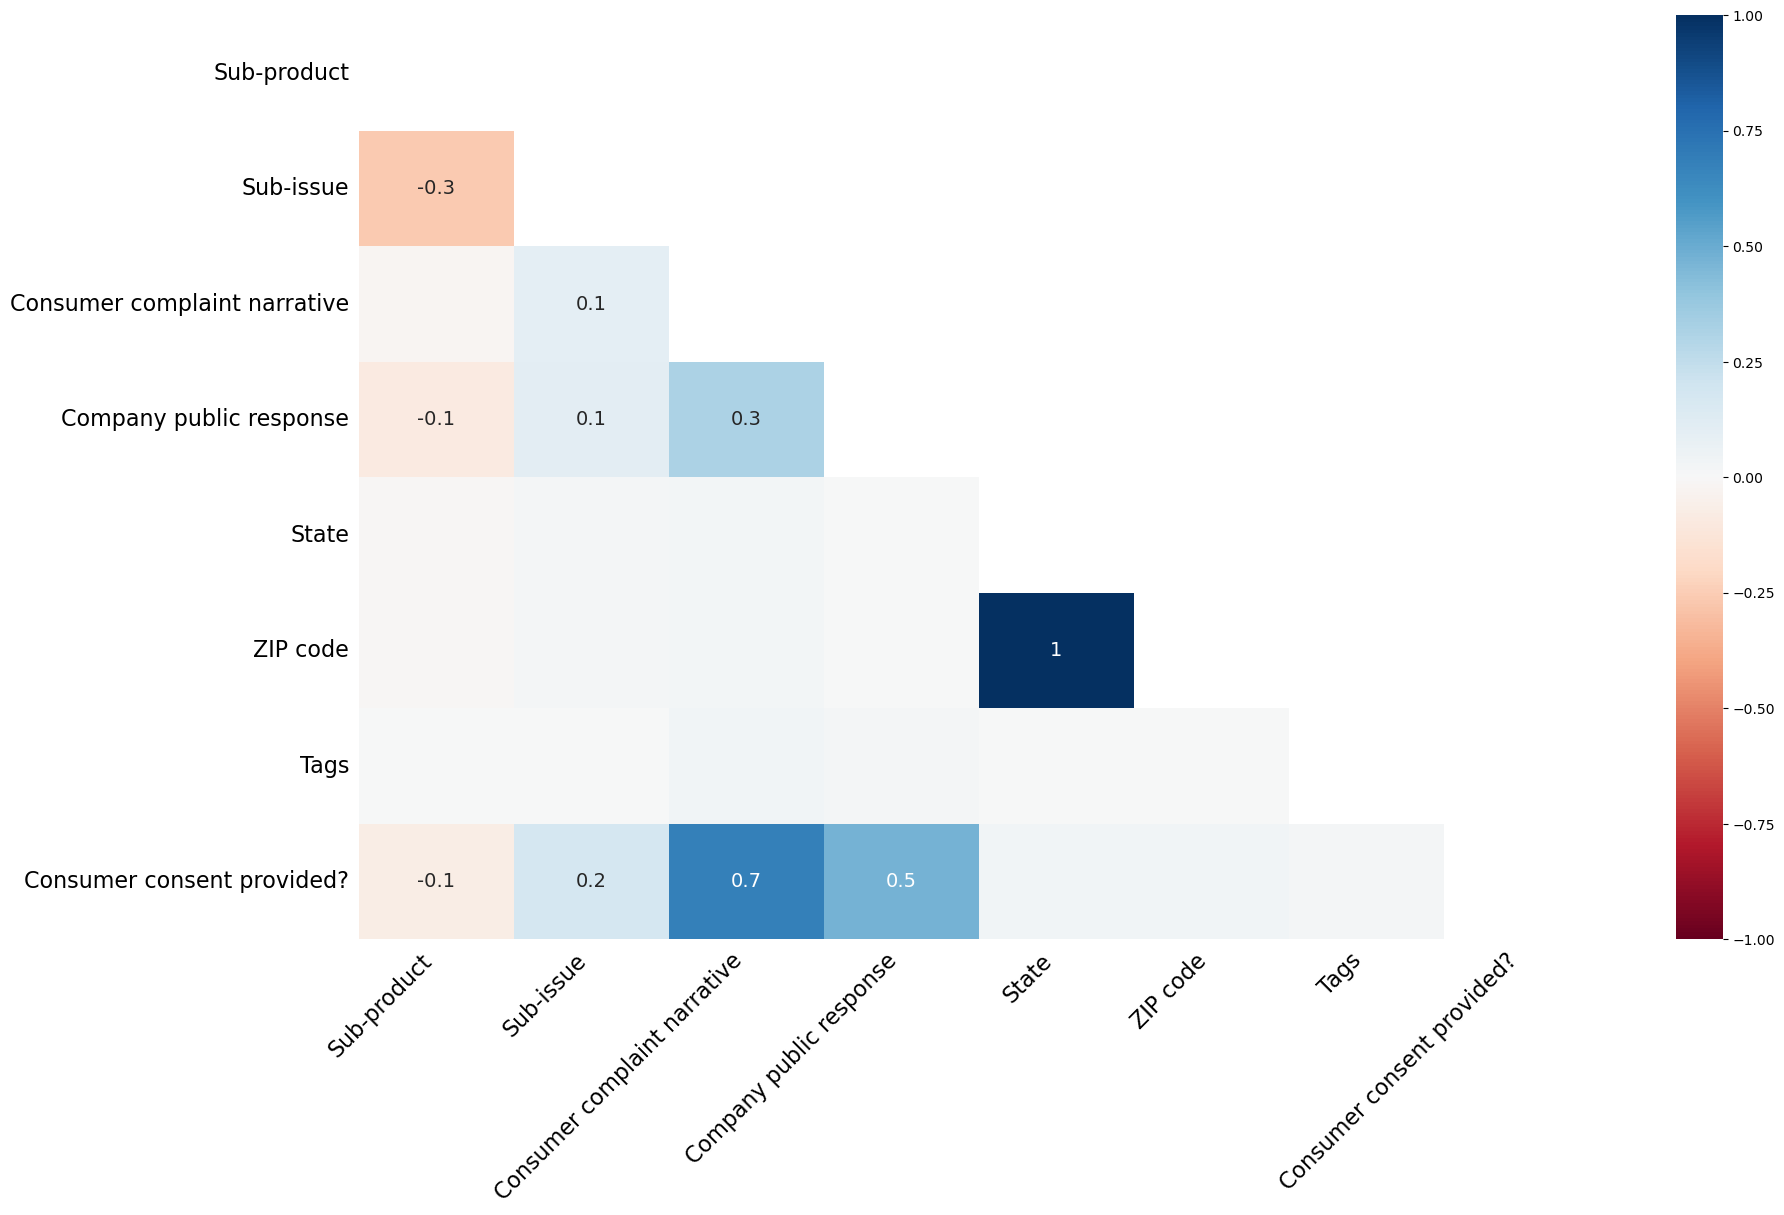

In [9]:
import missingno as msno
msno.heatmap(bd_train)

Many null values are present in the heatmap presentation above.
1) Sub-product with 28.94% of values being null.
2) Sub-Issue: 61.16% of values are null.
3) Company public response as 81.11% of null values.
4) Customer complaint narrative represents 84.30% of the null values.
5) Consumer complaint narrative 85.90% of null values.

In [10]:
bd_train.shape                                                                           #return the dimension for train dataset

(478421, 18)

# Consumer disputed?

In [11]:
import matplotlib.pyplot as plt
def show_donut_plot(col):
    
    rating_data = bd_train.groupby(col)[['Product']].count().head(10)
    plt.figure(figsize = (12, 8))
    plt.pie(rating_data['Product'].values, autopct='%1.0f%%', startangle=140, pctdistance=1.1, shadow=True)

    # create a center circle for more aesthetics to make it better
    gap = plt.Circle((0, 0), 0.5, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(gap)
    
    plt.axis('equal')
    
    cols = []
    for index, row in rating_data.iterrows():
        cols.append(index)
    plt.legend(cols)
    
    plt.title('Donut Plot by ' +str(col), loc='center')
    
    plt.show()

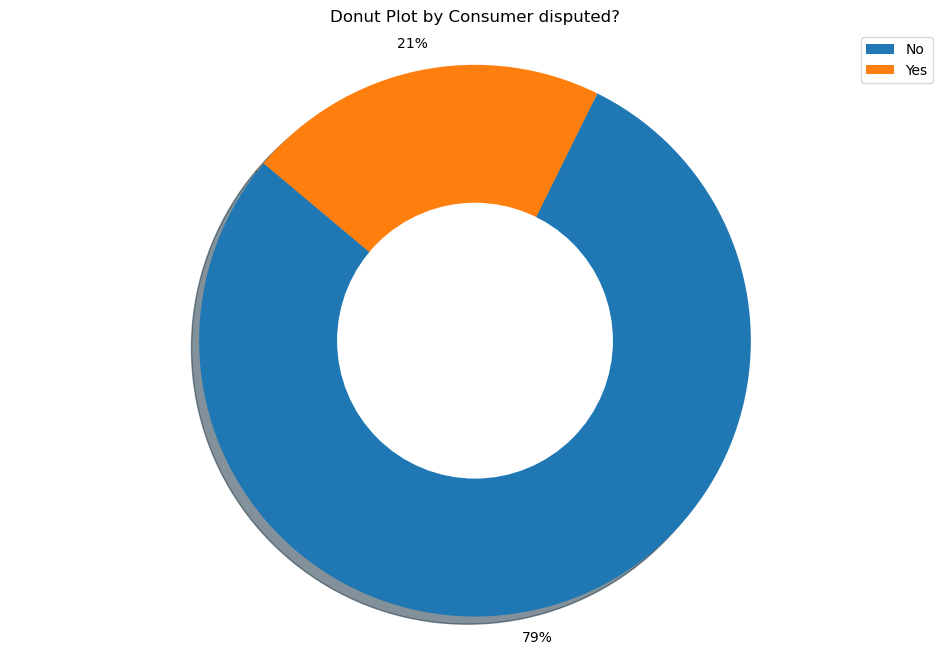

In [12]:
show_donut_plot('Consumer disputed?') 

About 78.79% of the consumer disputed have no dispute and 21.20% have dispute, so we have a somewhat unbalanced classification problem.

# Product

In [13]:
len(bd_train['Product'].unique())

12

In [14]:
bd_train['Product'].value_counts()

Mortgage                   156175
Debt collection             86544
Credit reporting            81115
Credit card                 57358
Bank account or service     54403
Consumer Loan               18599
Student loan                14918
Money transfers              3349
Payday loan                  3219
Prepaid card                 2226
Other financial service       507
Virtual currency                8
Name: Product, dtype: int64

Text(0, 0.5, 'Count')

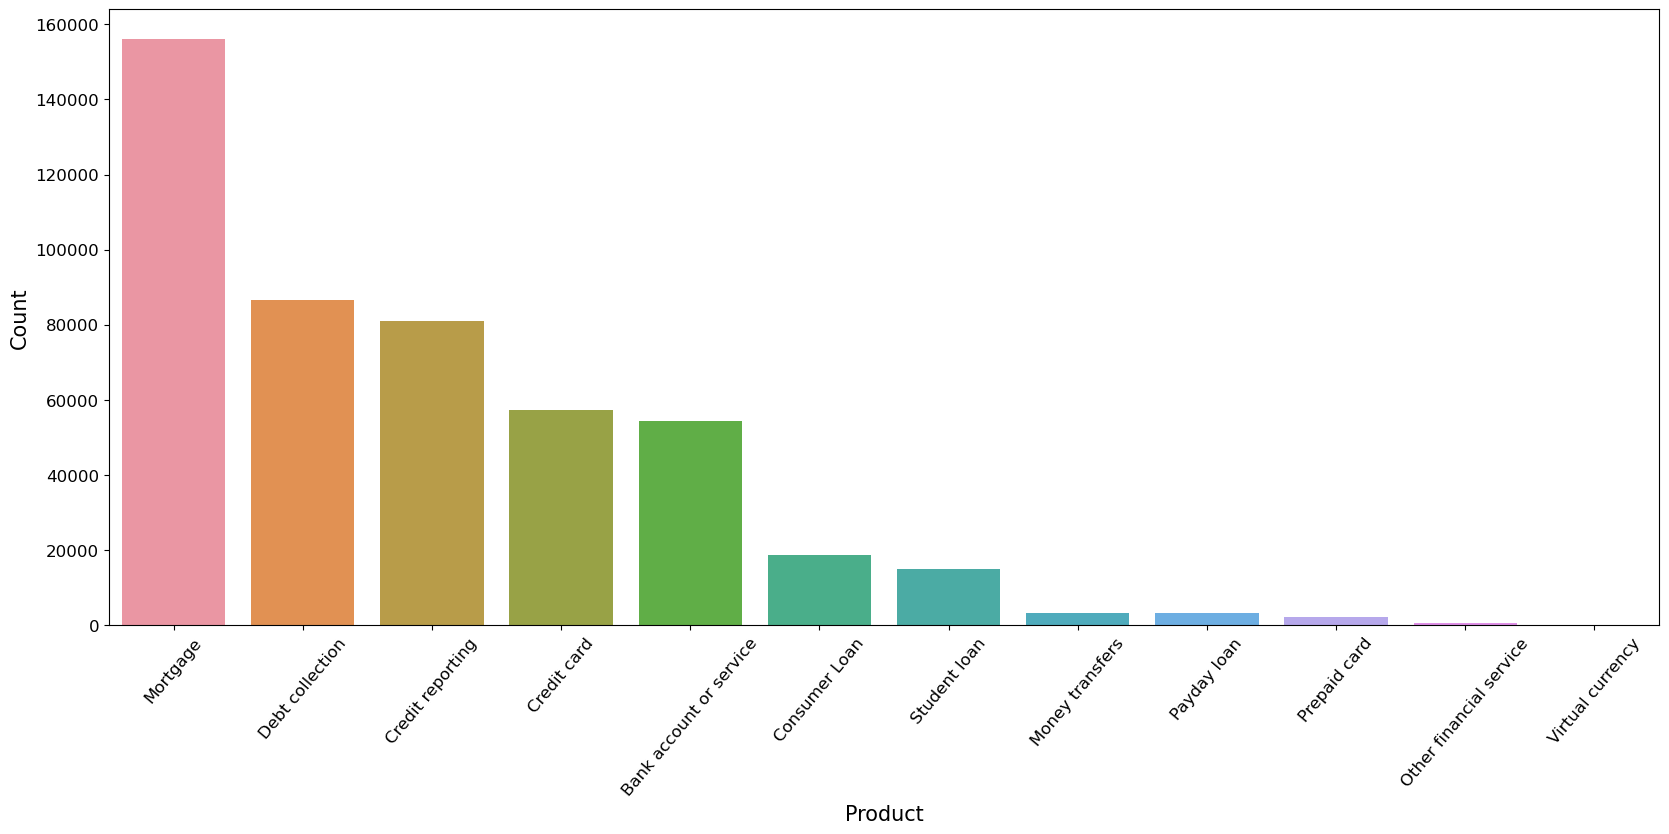

In [15]:
# Distribution of Complaints by Product
plt.figure(figsize = (20,8))
plt.xticks(rotation=50, fontsize=12)
plt.yticks(fontsize=12)
a = sns.countplot(x='Product', data = bd_train,  order = bd_train["Product"].value_counts().index)
a.set_xlabel("Product", fontsize=15)
a.set_ylabel("Count", fontsize=15)

# Date sent to company, Date received

In [16]:
for col in ['Date sent to company','Date received']:                          #convert data type of datetime, object to datetime
    bd_train[col] = pd.to_datetime(bd_train[col],infer_datetime_format=True)

In [17]:
bd_train['day_difffrom_Date'] = pd.to_numeric(bd_train['Date sent to company'] - bd_train['Date received'])
#add a new col concat_both for diff. between the Date sent to company & Date received col.

In [18]:
bd_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_difffrom_Date
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103,86400000000000
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666,518400000000000
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363,1814400000000000
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177,0
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572,691200000000000


In [19]:
for col in ['Date sent to company','Date received']:                          #drop the Date sent to company & Date received col
    bd_train.drop([col],axis=1,inplace=True)

In [20]:
bd_train.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_difffrom_Date
0,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,Closed with explanation,Yes,No,856103,86400000000000
1,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,Closed,Yes,No,1034666,518400000000000
2,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000
3,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,Closed with monetary relief,Yes,No,1474177,0
4,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,Closed with explanation,Yes,No,1132572,691200000000000


In [21]:
for col in bd_train.select_dtypes(['object']).columns:                                #print object col & how many unique value
    print(col,":",bd_train[col].nunique())

Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Consumer complaint narrative : 74019
Company public response : 10
Company : 3276
State : 62
ZIP code : 25962
Tags : 3
Consumer consent provided? : 4
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


# Company public response

In [22]:
bd_train['Company public response'].isnull().sum()

388029

In [23]:
bd_train['Company public response'].nunique()

10

In [24]:
bd_train['Company public response'].value_counts()

Company chooses not to provide a public response                                                                           41915
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            25672
Company believes it acted appropriately as authorized by contract or law                                                   16040
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1460
Company believes the complaint is the result of a misunderstanding                                                          1418
Company disputes the facts presented in the complaint                                                                       1395
Company believes complaint is the result of an isolated error                                                               1062
Company can't verify or dispute the facts in the complaint                                       

Text(0, 0.5, 'Count')

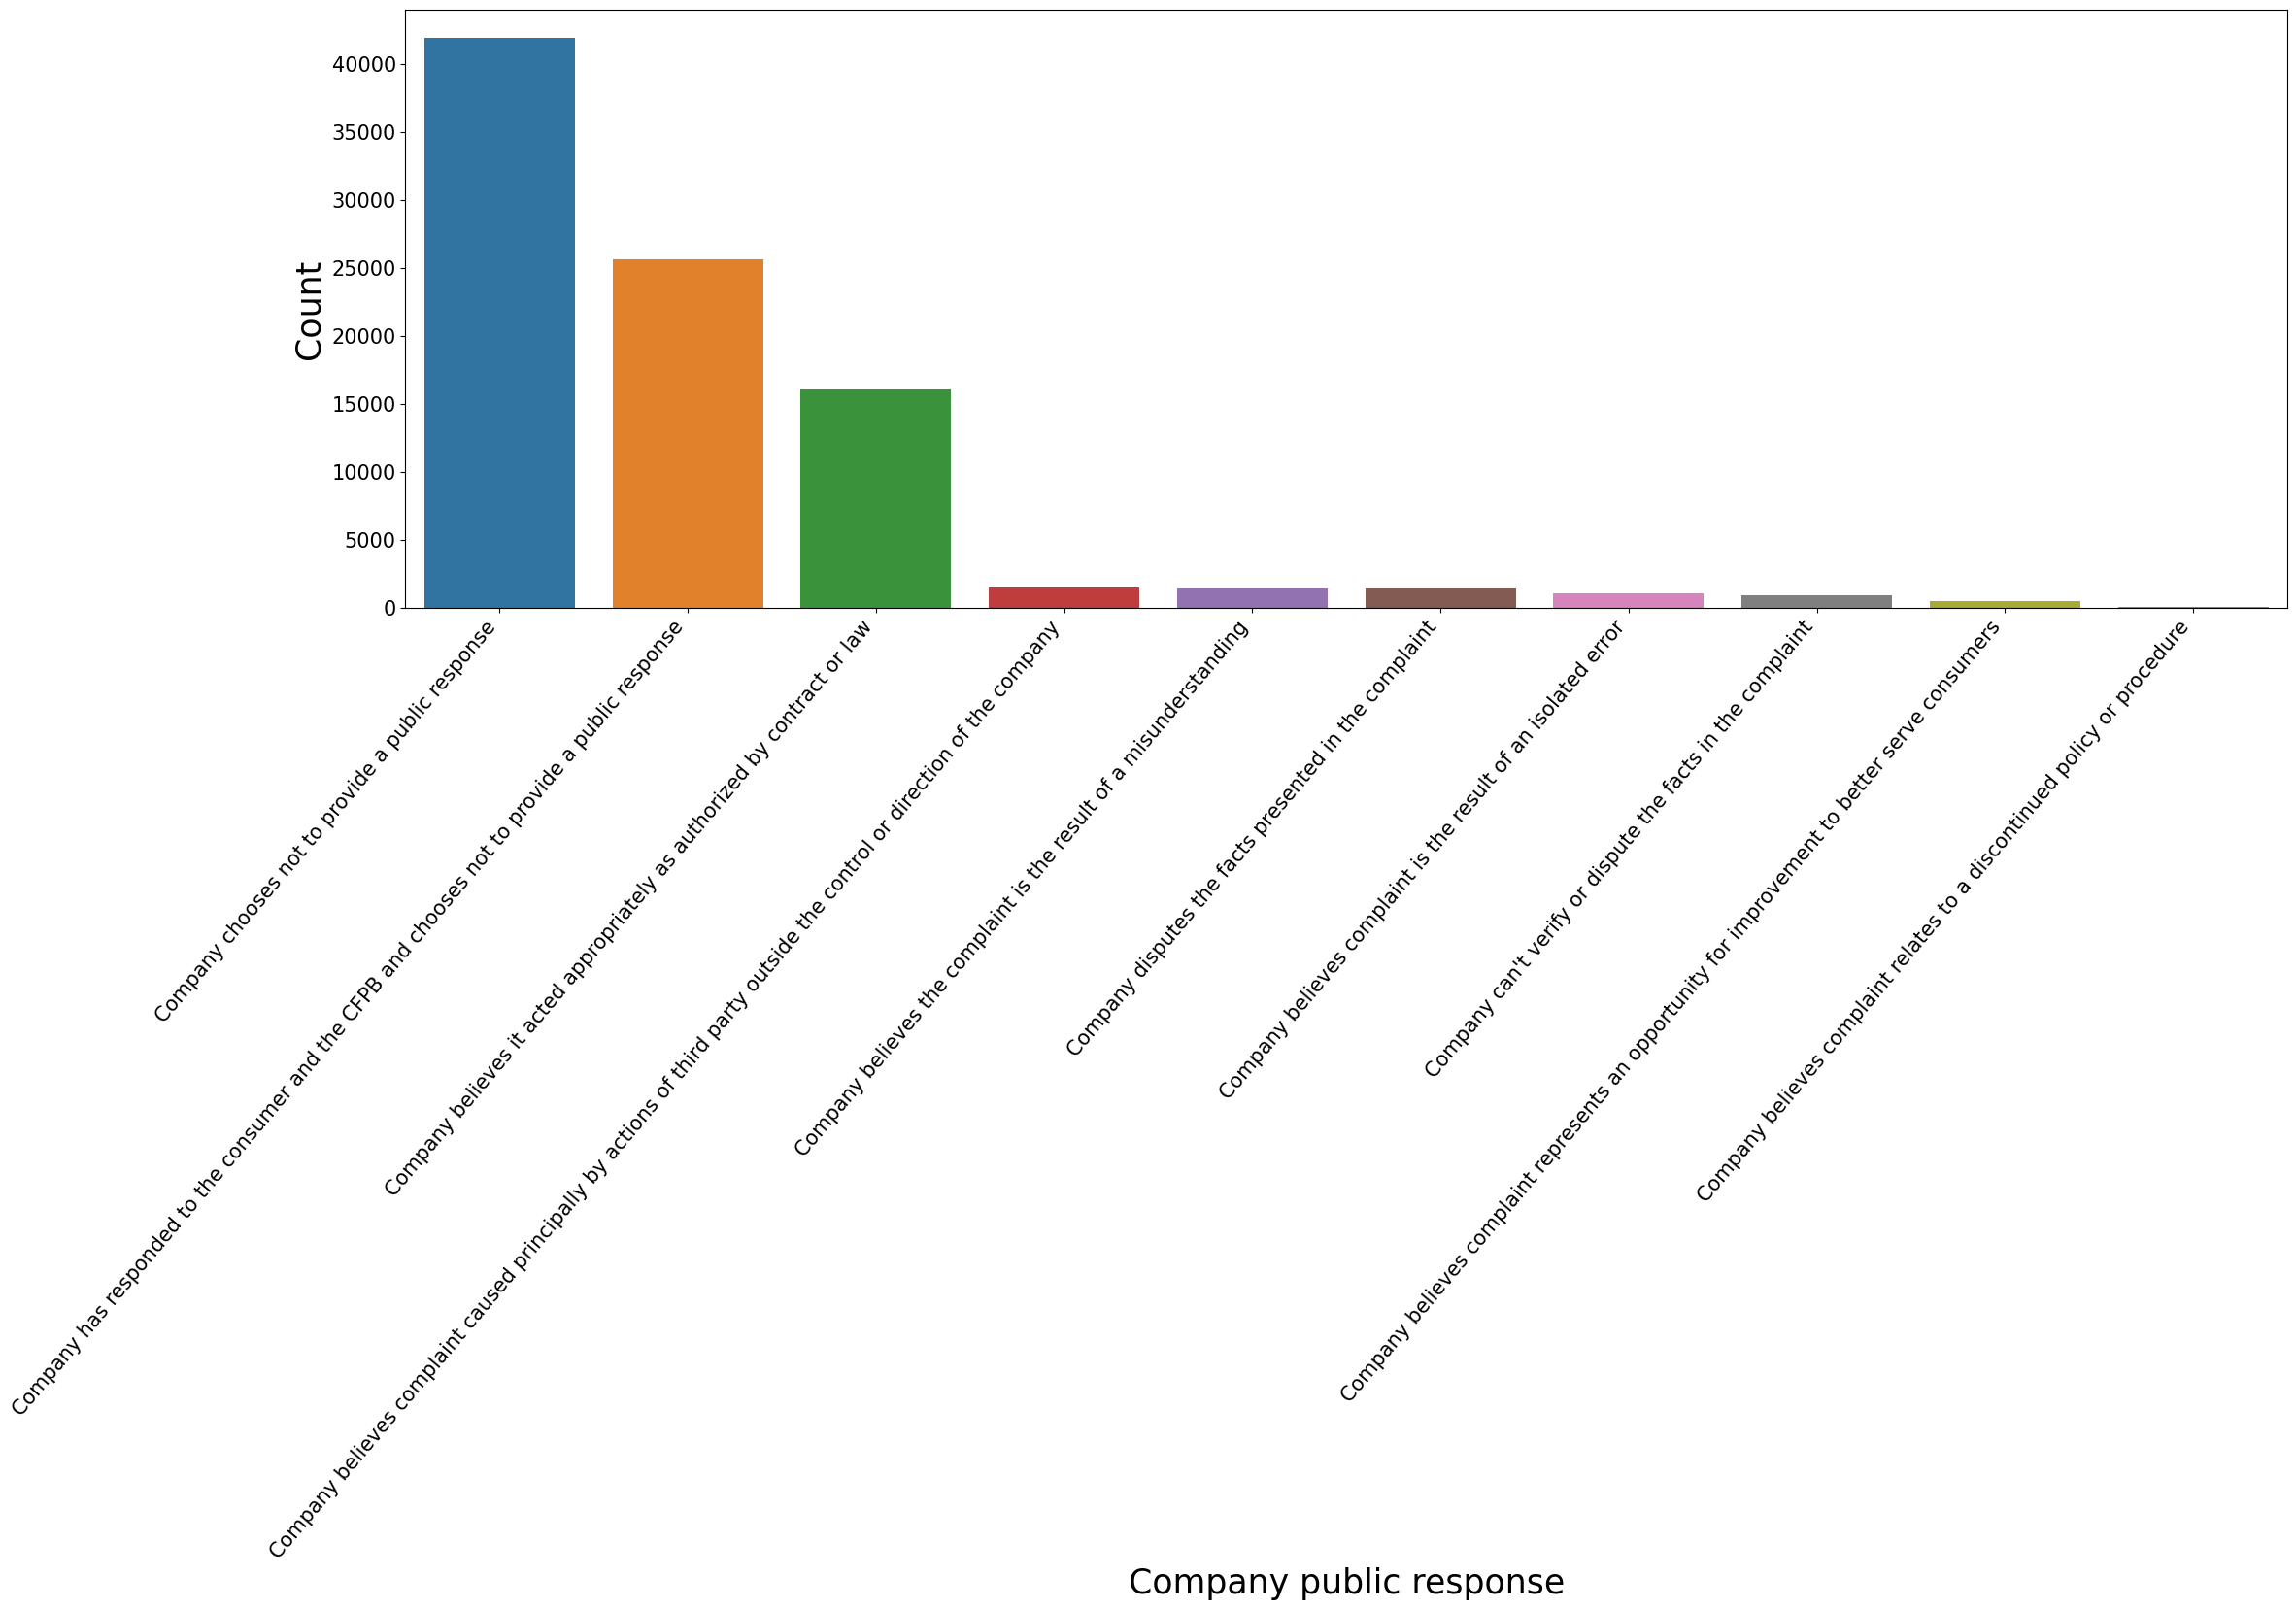

In [25]:
plt.figure(figsize = (25,8))                                                            # Distribution of Company pulic response
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
a = sns.countplot(x='Company public response', data = bd_train,  order = bd_train["Company public response"].value_counts().index)
a.set_xlabel("Company public response", fontsize=25)
a.set_ylabel("Count", fontsize=25)

in the graph above Company chooses not to provide a public response is more and Company chooses not to provide a public response is less.

# Consumer complaint narrative

In [26]:
bd_train['Consumer complaint narrative'].isnull().sum()

403327

In [27]:
bd_train['Consumer complaint narrative'].nunique()

74019

In [28]:
bd_train['Consumer complaint narrative'].head(20)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3     My credit card statement from US Bank, XXXX. X...
4                                                   NaN
5                                                   NaN
6                                                   NaN
7     I have a mortgage with Quicken Loans. From XXX...
8                                                   NaN
9     I put my settlement check in to bank of americ...
10                                                  NaN
11    All XXXX credit bureaus list XXXX state tax li...
12                                                  NaN
13                                                  NaN
14    I received a letter from Ocwen 's Office of th...
15                                                  NaN
16                                                  NaN
17                                              

# Consumer consent provided?

In [29]:
bd_train['Consumer consent provided?'].isnull().sum()

342934

In [30]:
bd_train['Consumer consent provided?'].nunique()

4

In [31]:
bd_train['Consumer consent provided?'].value_counts()

Consent provided        75095
Consent not provided    56147
Other                    4242
Consent withdrawn           3
Name: Consumer consent provided?, dtype: int64

<AxesSubplot:xlabel='Consumer consent provided?', ylabel='count'>

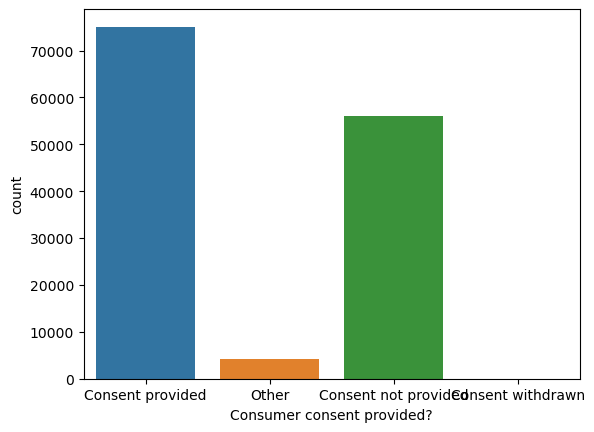

In [32]:
sns.countplot(x="Consumer consent provided?", data=bd_train)

# Sub-product

In [33]:
bd_train['Sub-product'].isnull().sum()

138473

In [34]:
bd_train['Sub-product'].nunique()

47

In [35]:
bd_train['Sub-product'].value_counts()

Other mortgage                            61522
Conventional fixed mortgage               48028
Checking account                          38310
Other (i.e. phone, health club, etc.)     25691
I do not know                             18169
Credit card                               17981
Conventional adjustable mortgage (ARM)    17566
FHA mortgage                              16316
Non-federal student loan                  15287
Medical                                   11514
Vehicle loan                              10714
Other bank product/service                 9896
Payday loan                                7837
Home equity loan or line of credit         7605
Installment loan                           4788
Savings account                            3419
VA mortgage                                3285
Mortgage                                   3033
(CD) Certificate of deposit                2373
Auto                                       2167
International money transfer            

Text(0, 0.5, 'Count')

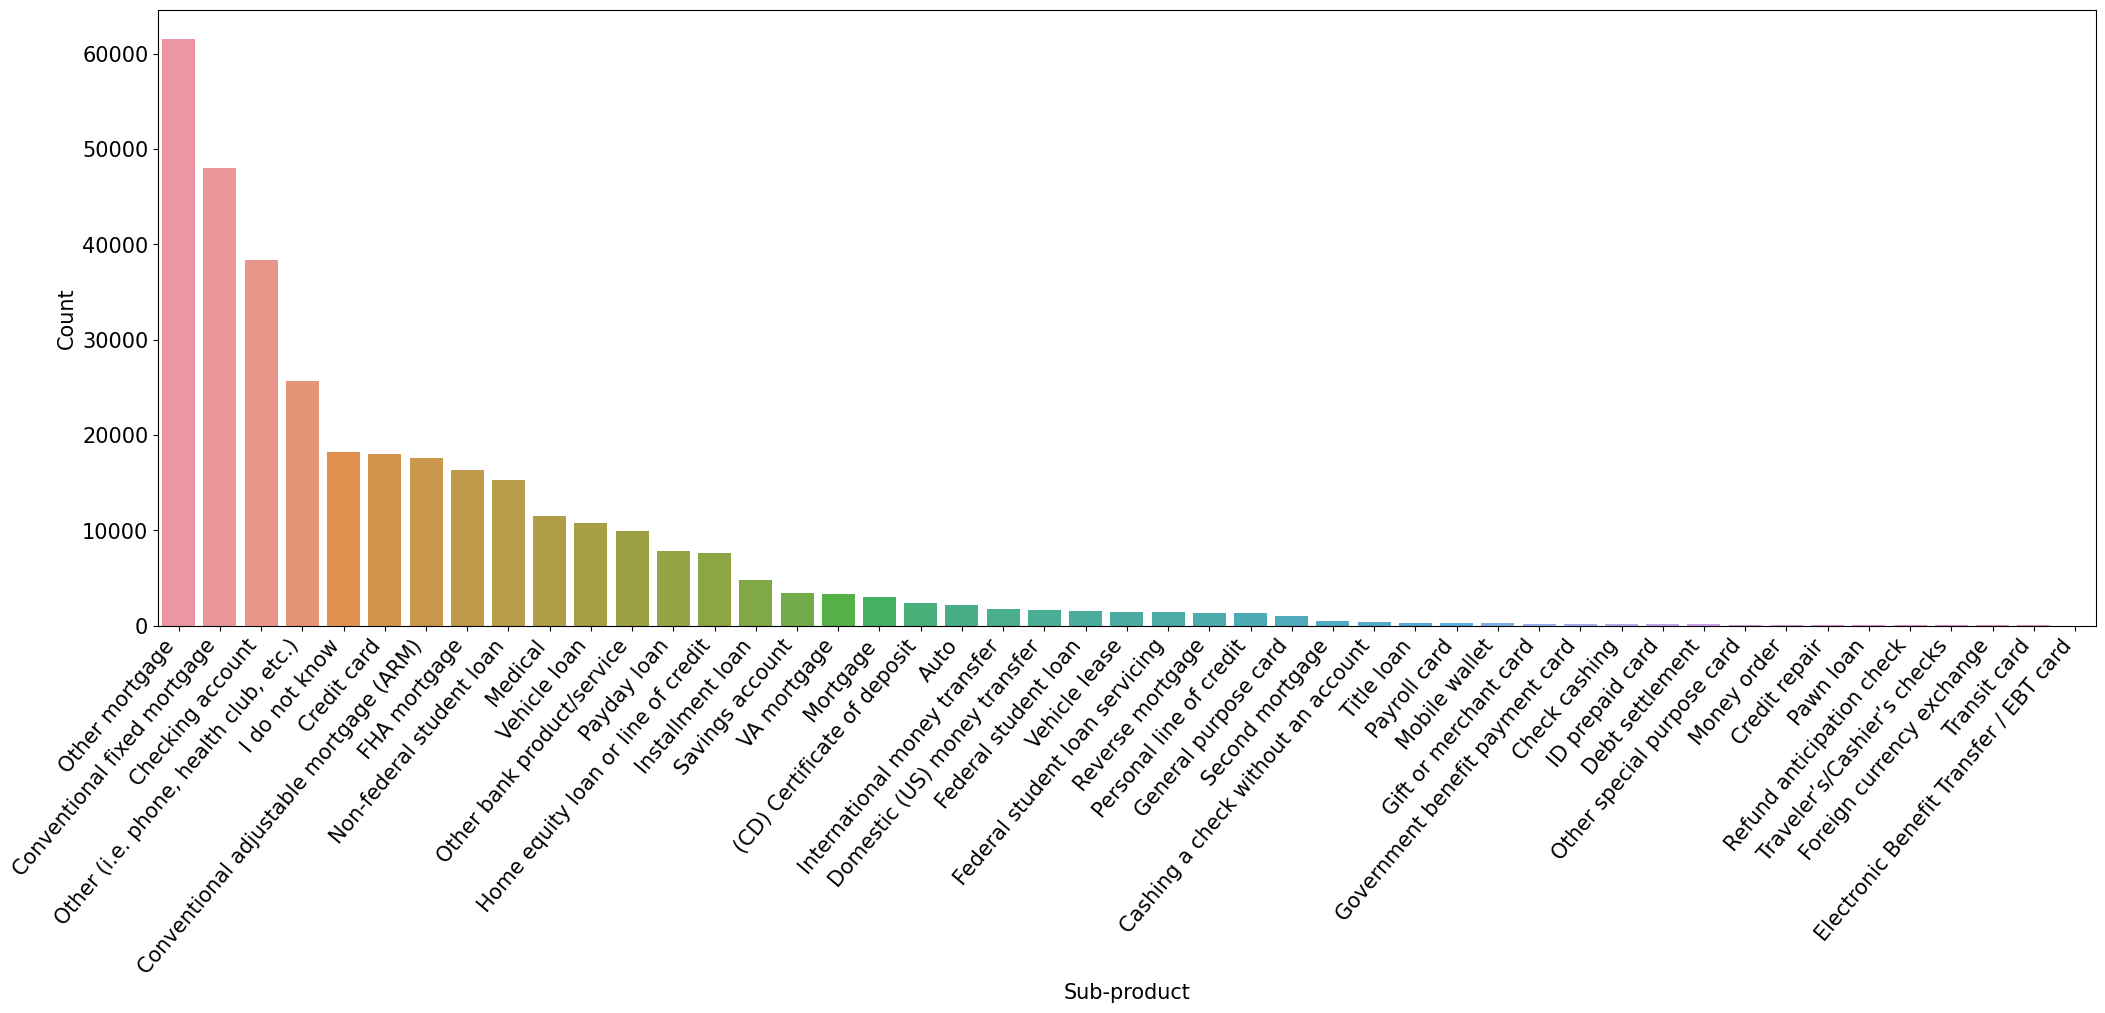

In [36]:
plt.figure(figsize = (25,8))                                                         # Distribution of Complaints by sub-Product
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
a = sns.countplot(x='Sub-product', data = bd_train,  order = bd_train["Sub-product"].value_counts().index)
a.set_xlabel("Sub-product", fontsize=15)
a.set_ylabel("Count", fontsize=15)

# Sub-issue

In [37]:
bd_train['Sub-issue'].isnull().sum()

292625

In [38]:
bd_train['Sub-issue'].value_counts(normalize=True, dropna=False).head()

NaN                                     0.611647
Account status                          0.047847
Debt is not mine                        0.046681
Information is not mine                 0.036840
Not given enough info to verify debt    0.023251
Name: Sub-issue, dtype: float64

In [39]:
bd_train['Sub-issue'].nunique()

68

# Tags

In [40]:
bd_train['Tags'].isnull().sum()

411215

In [41]:
bd_train['Tags'].nunique()

3

In [42]:
bd_train['Tags'].value_counts()

Older American                   39064
Servicemember                    22592
Older American, Servicemember     5550
Name: Tags, dtype: int64

<AxesSubplot:xlabel='Tags', ylabel='count'>

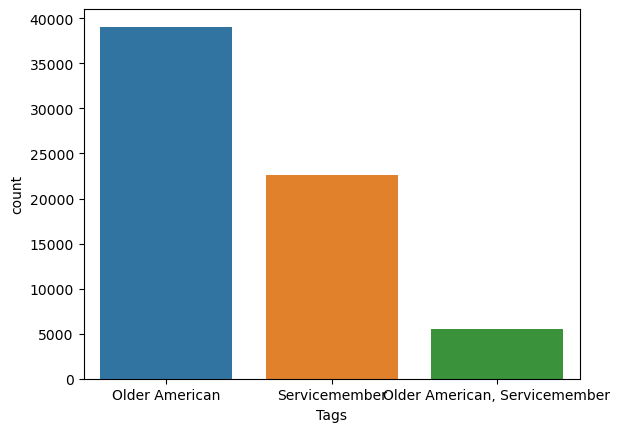

In [43]:
sns.countplot(x="Tags", data=bd_train,order = bd_train["Tags"].value_counts().index)

In [44]:
for col in ['Company public response','Consumer complaint narrative',
            'Consumer consent provided?','Sub-issue',"Sub-product",'Tags']:
    replace_name = col.replace(' ','_').replace('?','_').replace('-','_') + '_isNaN'    #replace the " "and "?" and "-" with "_"
    bd_train[replace_name] = np.where(pd.isnull(bd_train[col]),1,0)
    del bd_train[col] 

In [45]:
for col in bd_train.select_dtypes(['object']).columns:                                 #print object col & how many unique value
    print(col,":",bd_train[col].nunique())

Product : 12
Issue : 95
Company : 3276
State : 62
ZIP code : 25962
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [46]:
bd_train.head()

,Product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_difffrom_Date,Company_public_response_isNaN,Consumer_complaint_narrative_isNaN,Consumer_consent_provided__isNaN,Sub_issue_isNaN,Sub_product_isNaN,Tags_isNaN
0,Credit card,Billing statement,Wells Fargo & Company,MI,48342,Web,Closed with explanation,Yes,No,856103,86400000000000,1,1,1,1,1,0
1,Bank account or service,"Making/receiving payments, sending money",Santander Bank US,PA,18042,Referral,Closed,Yes,No,1034666,518400000000000,1,1,1,1,0,1
2,Credit reporting,Incorrect information on credit report,Equifax,CA,92427,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000,1,1,1,0,1,1
3,Credit card,Billing statement,U.S. Bancorp,GA,305XX,Web,Closed with monetary relief,Yes,No,1474177,0,0,0,0,1,1,0
4,Credit card,Transaction issue,Bank of America,MA,02127,Web,Closed with explanation,Yes,No,1132572,691200000000000,1,1,1,1,1,1


# Company

In [47]:
bd_train['Company'].isnull().sum()

0

In [48]:
bd_train['Company'].nunique()

3276

In [49]:
bd_train['Company'].value_counts()

Bank of America                         46336
Wells Fargo & Company                   35453
JPMorgan Chase & Co.                    28852
Equifax                                 28832
Experian                                26794
                                        ...  
Sunlan Corporation                          1
Century Financial Group                     1
Platinum Finance Company, LLC               1
Law Office of Cynthia Hitt Kent, LLC        1
Advance Title & Abstract, Inc.              1
Name: Company, Length: 3276, dtype: int64

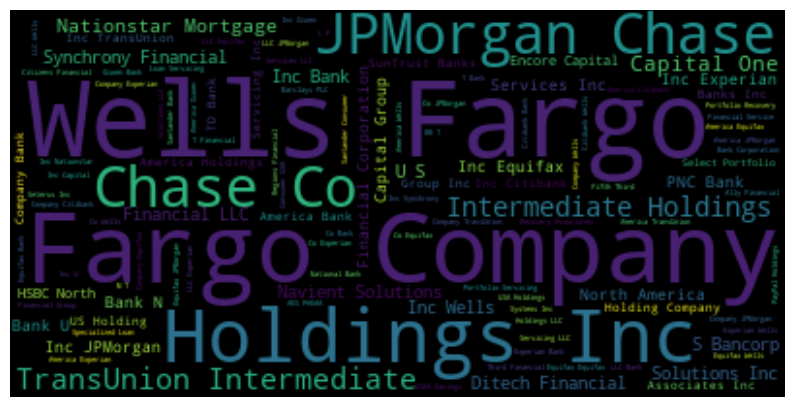

In [50]:
from wordcloud import WordCloud                                                    # most frequently used words using word cloud
all_articles = ' '.join(bd_train['Company'])
wordcloud_spam = WordCloud().generate(all_articles)
plt.figure(figsize = (10,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Count')

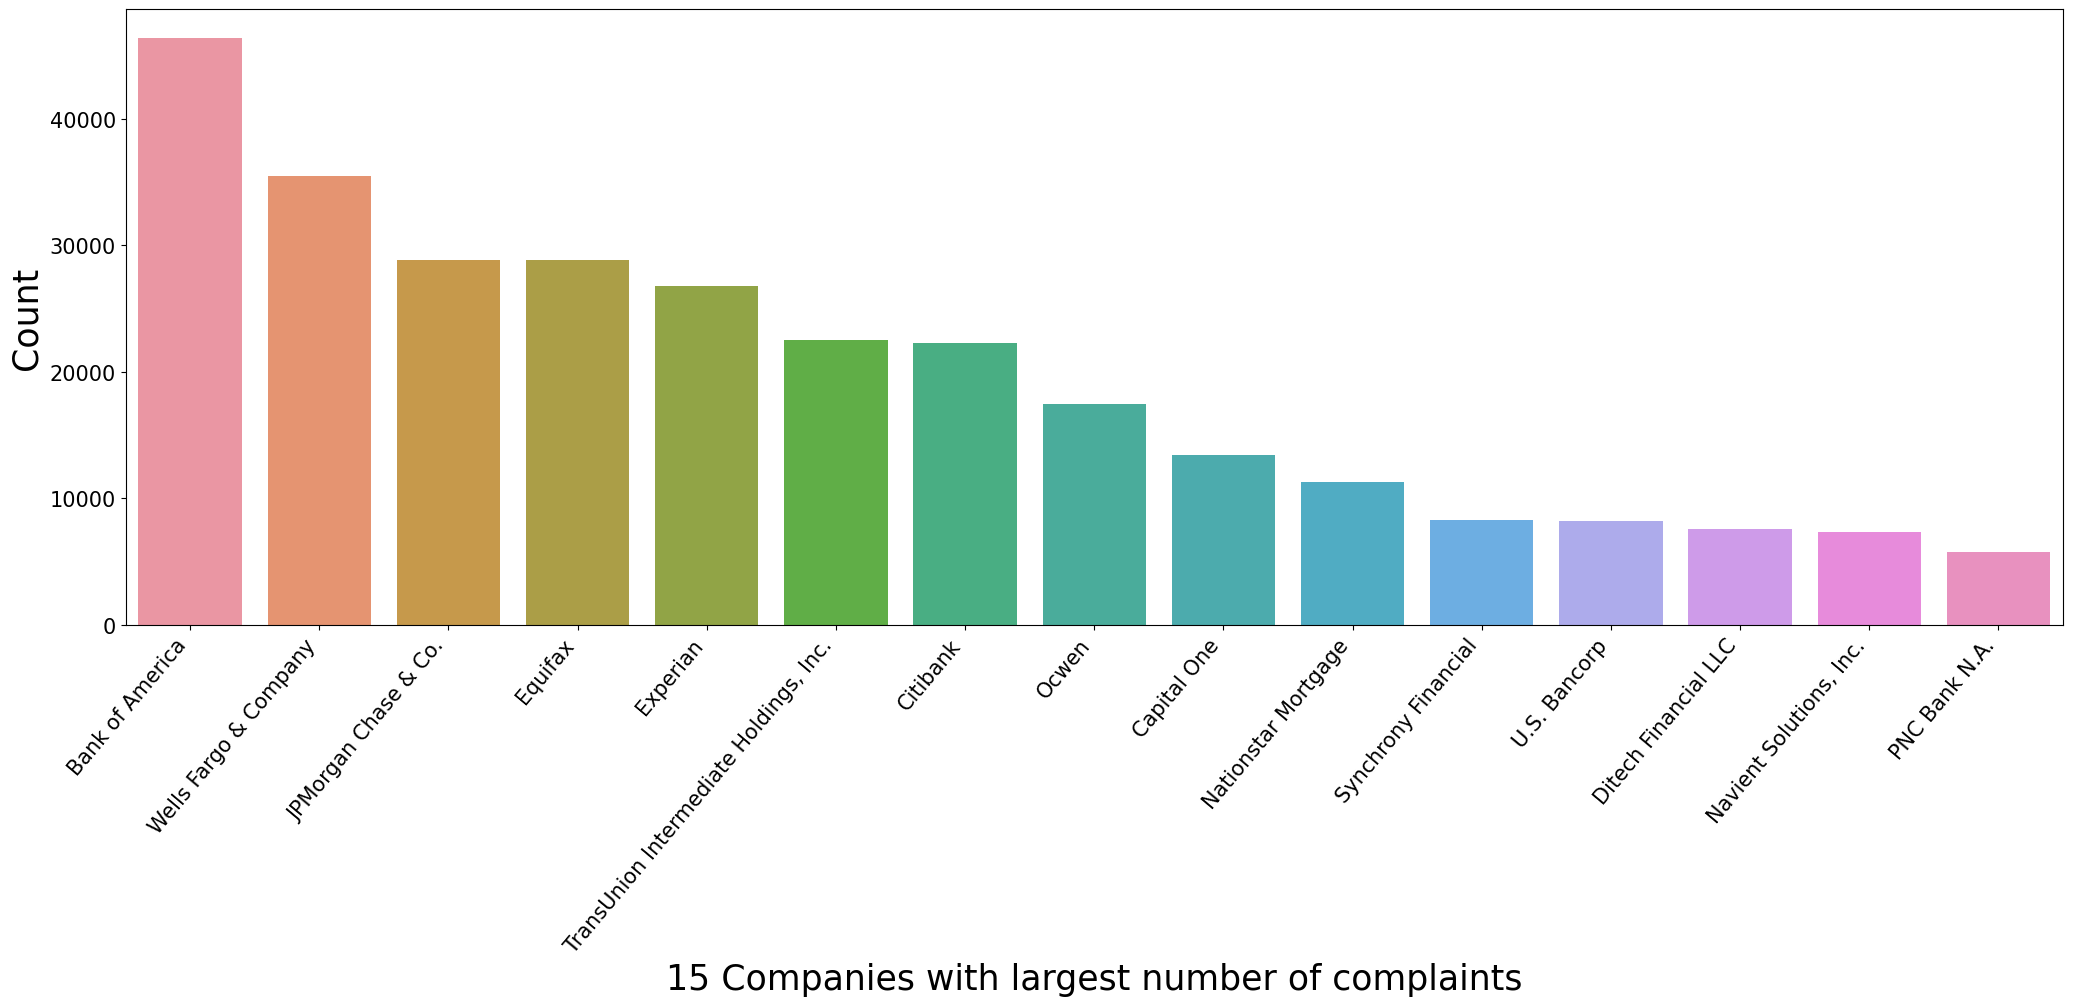

In [51]:
plt.figure(figsize=(25,8))                                                   #top 15 companies with largest number of complaints
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.barplot(x='Company', y='Complaint ID', data=bd_train.groupby('Company').count().sort_values('Complaint ID', ascending=False).reset_index().head(15), order=bd_train['Company'].value_counts().head(15).index)
g.set_xlabel("15 Companies with largest number of complaints", fontsize=25)
g.set_ylabel("Count", fontsize=25)

In [52]:
for col in ['ZIP code','Company']:                          #drop ZIP code,Company col lot's of null value is present in the col
    bd_train.drop([col],axis=1,inplace=True)

# Issue

In [53]:
bd_train['Issue'].isnull().sum()

0

In [54]:
bd_train['Issue'].nunique()

95

In [55]:
bd_train['Issue'].value_counts().head()

Loan modification,collection,foreclosure    80302
Incorrect information on credit report      58527
Loan servicing, payments, escrow account    51403
Cont'd attempts collect debt not owed       36367
Account opening, closing, or management     23568
Name: Issue, dtype: int64

Text(0, 0.5, 'Count')

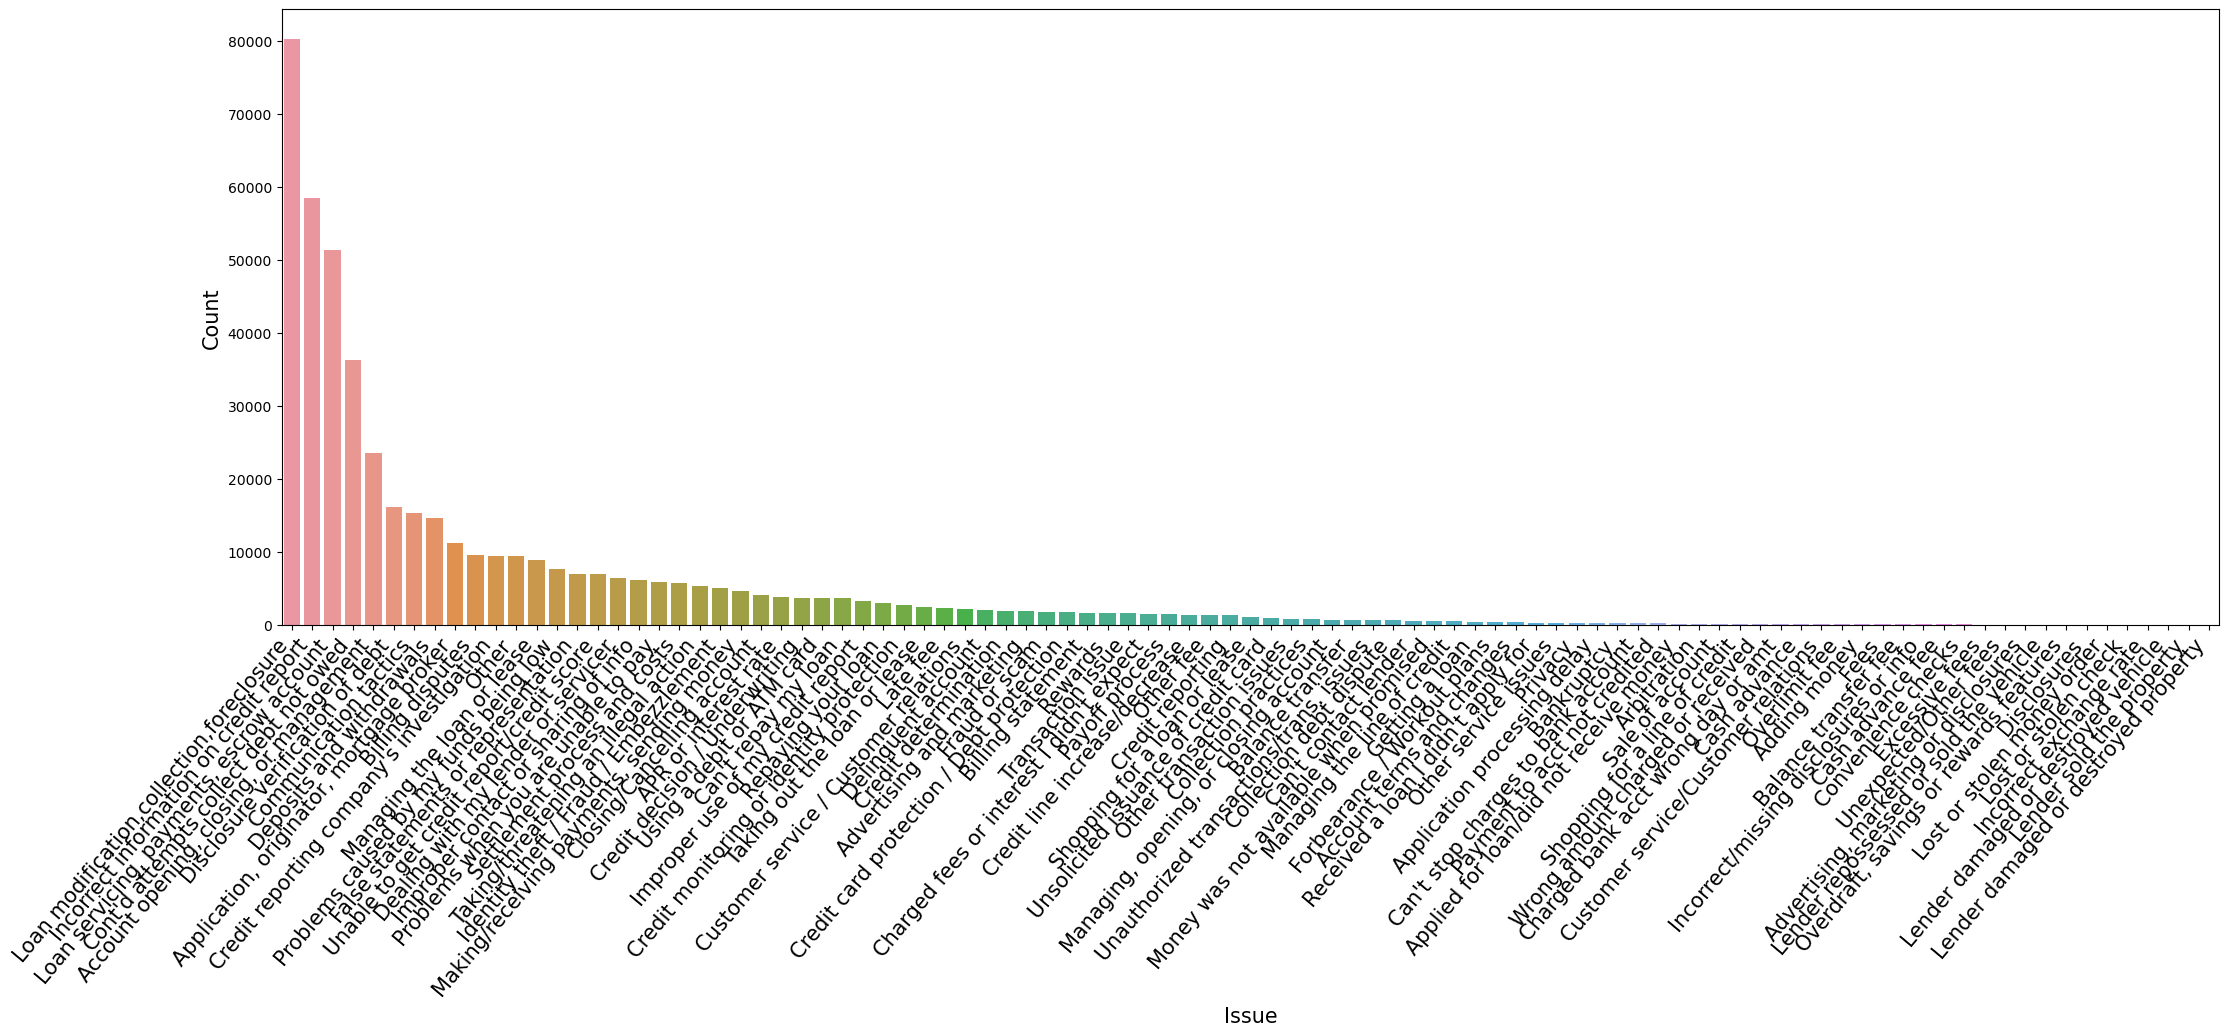

In [56]:
plt.figure(figsize = (25,8))                                                             #Distribution of Complaints by Product
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=10)
a = sns.countplot(x='Issue', data = bd_train,  order = bd_train["Issue"].value_counts().index)
a.set_xlabel("Issue", fontsize=15)
a.set_ylabel("Count", fontsize=15)

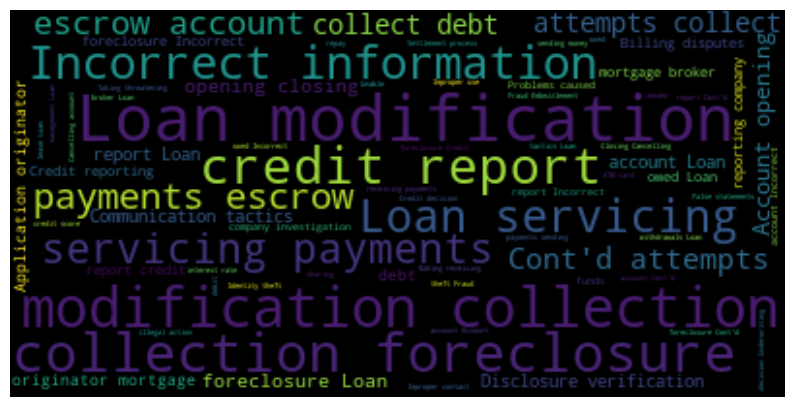

In [57]:
from wordcloud import WordCloud                                                                    # used words using word cloud
all_articles = ' '.join(bd_train['Issue'])
wordcloud_spam = WordCloud().generate(all_articles)
plt.figure(figsize = (10,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
k=bd_train['Issue'].value_counts()
for val in k.axes[0][0:10]:                                   #rearranging the data
    varname='Issue_'+val.replace(',','_').replace(' ','_')    #replace "," and " " with "_"
    bd_train[varname]=np.where(bd_train['Issue']==val,1,0)    #apply where cond and convert 1,0
del bd_train['Issue']                                         #delete issue objects in Python

# State

In [59]:
bd_train['State'].isnull().sum()

3839

In [60]:
bd_train['State'].nunique()

62

In [61]:
bd_train['State'].value_counts().head()

CA    70001
FL    46089
TX    35895
NY    32750
GA    21258
Name: State, dtype: int64

Text(0, 0.5, 'Count')

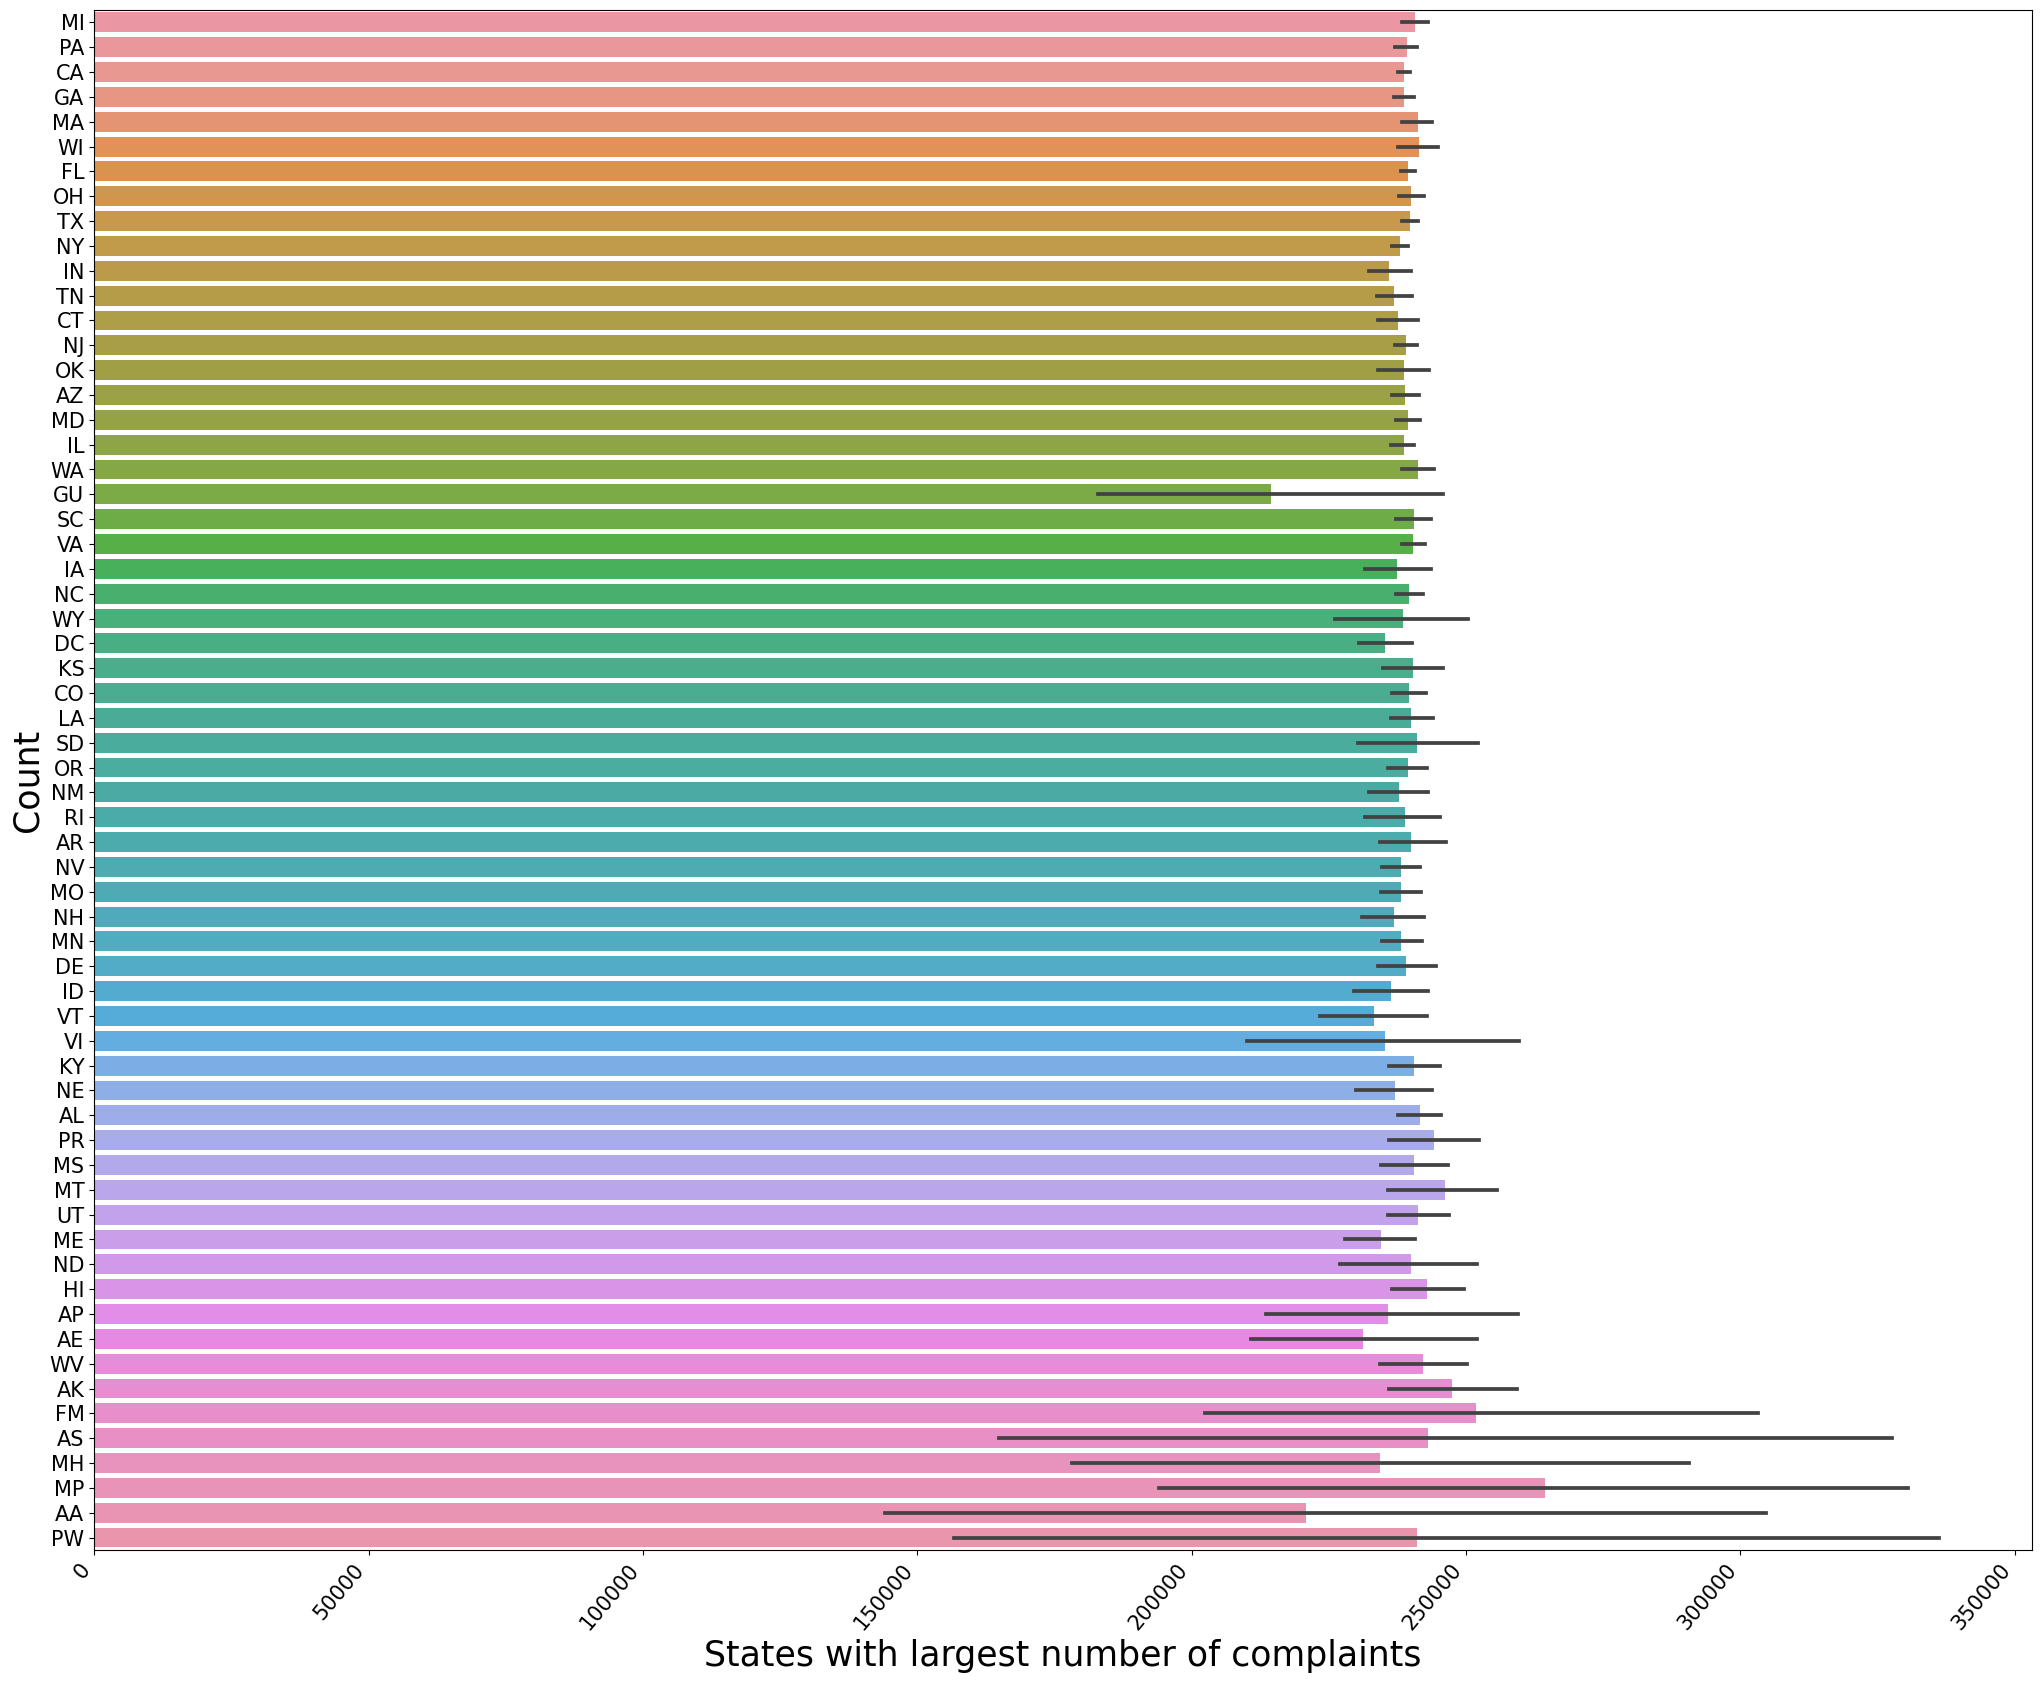

In [62]:
plt.figure(figsize = (25,20))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.barplot(bd_train['State'].index[0:], bd_train['State'].values[0:])
g.set_xlabel("States with largest number of complaints", fontsize=25)
g.set_ylabel("Count", fontsize=25)

In [63]:
k=bd_train['State'].value_counts()
for val in k.axes[0][0:10]:  #rearranging the data
    varname='State_'+val.replace(',','_').replace(' ','_') #replace "," and " " with "_"
    bd_train[varname]=np.where(bd_train['State']==val,1,0) #apply where cond and convert 1,0
del bd_train['State'] #delete State objects in Python

# Submitted via

In [64]:
bd_train['Submitted via'].isnull().sum()

0

In [65]:
bd_train['Submitted via'].nunique()

6

In [66]:
bd_train['Submitted via'].value_counts()

Web            313916
Referral        91352
Phone           34417
Postal mail     31448
Fax              7032
Email             256
Name: Submitted via, dtype: int64

<AxesSubplot:xlabel='Submitted via', ylabel='count'>

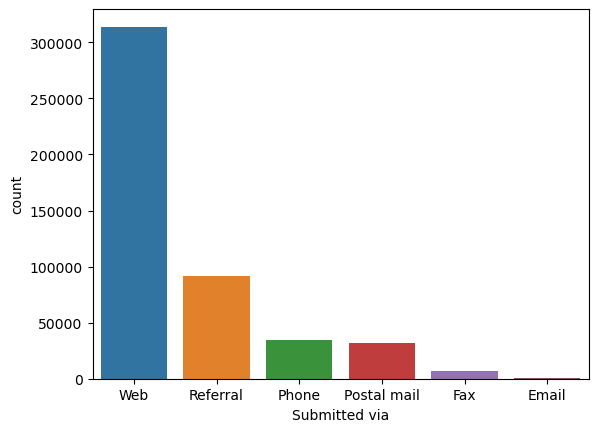

In [67]:
sns.countplot(x="Submitted via", data=bd_train,order = bd_train["Submitted via"].value_counts().index)

# Company response to consumer

In [68]:
bd_train['Company response to consumer'].isnull().sum()

0

In [69]:
bd_train['Company response to consumer'].nunique()

7

In [70]:
bd_train['Company response to consumer'].value_counts()

Closed with explanation            354310
Closed with non-monetary relief     61491
Closed with monetary relief         32925
Closed without relief               14145
Closed                              11365
Closed with relief                   4184
Untimely response                       1
Name: Company response to consumer, dtype: int64

Text(0, 0.5, 'Count')

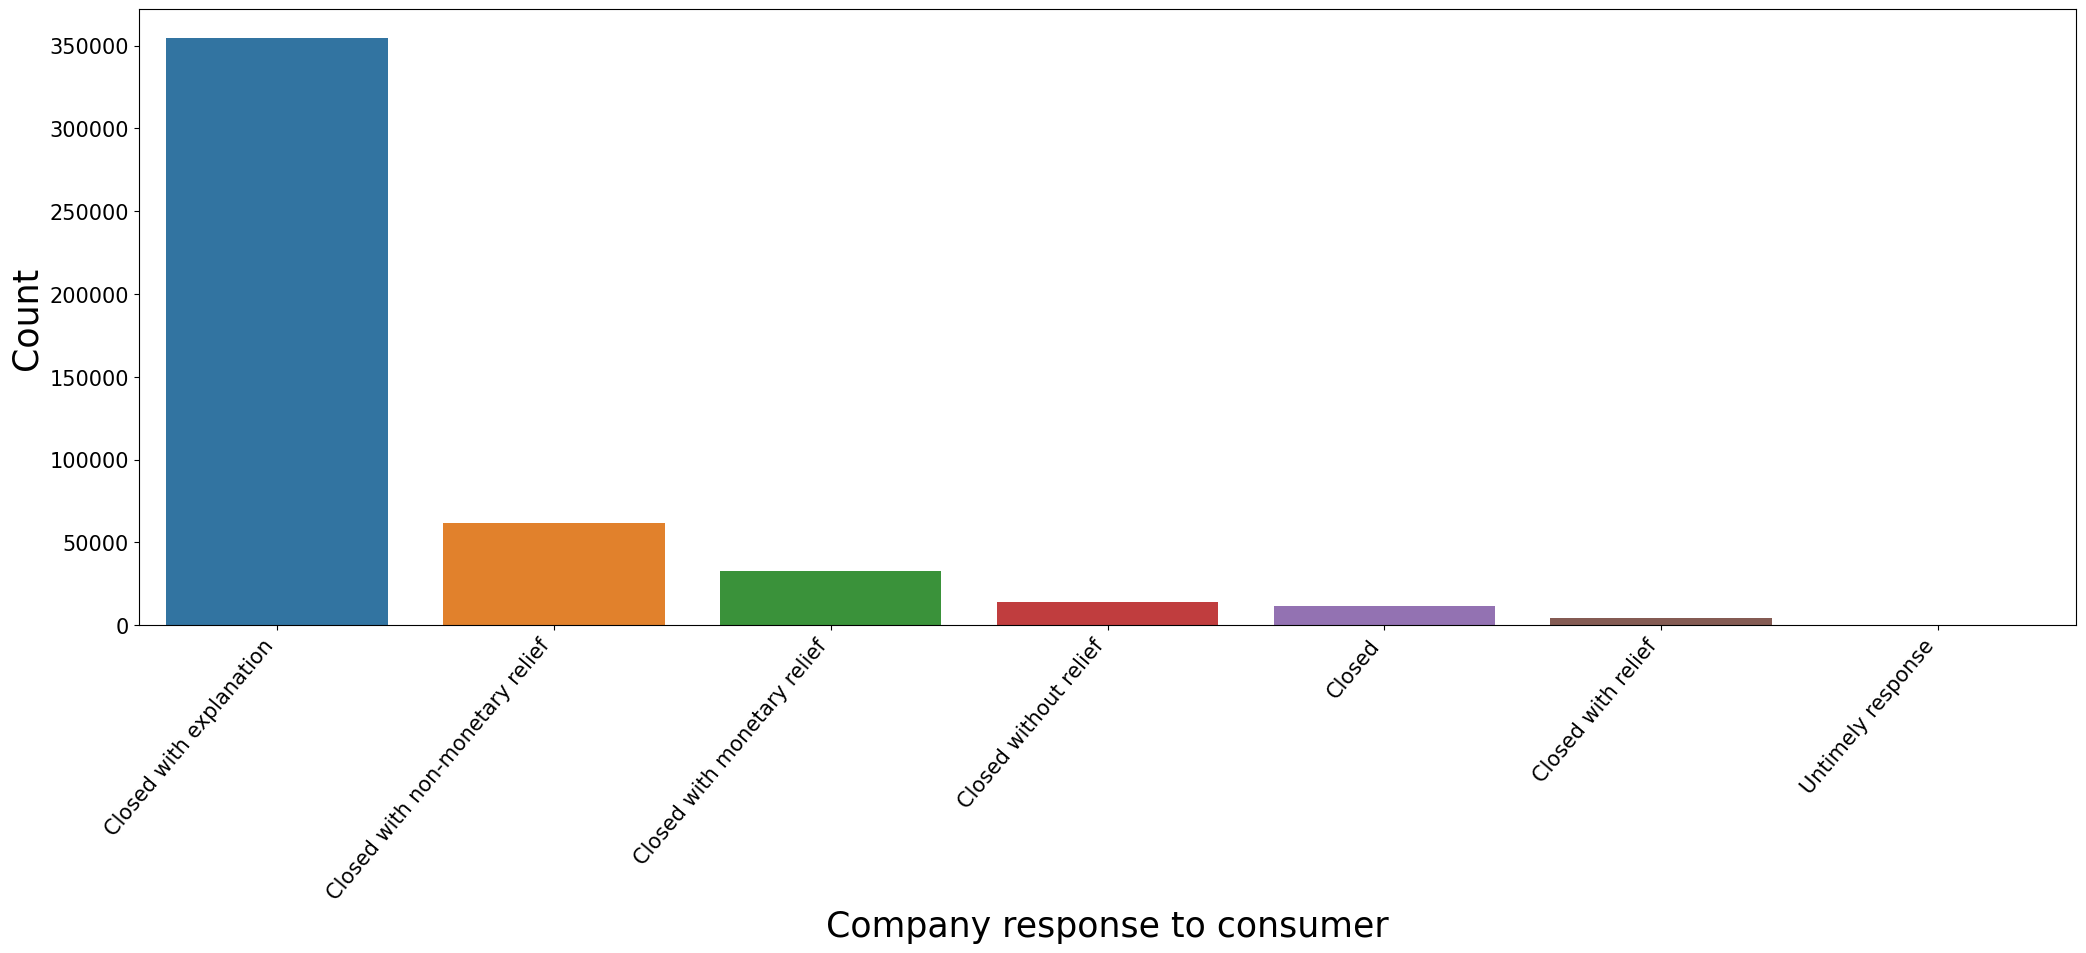

In [71]:
plt.figure(figsize = (25,8))                                                            # Distribution of Company pulic response
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Company response to consumer', data = bd_train,  order = bd_train["Company response to consumer"].value_counts().index)
g.set_xlabel("Company response to consumer", fontsize=25)
g.set_ylabel("Count", fontsize=25)

# Timely response?

In [72]:
bd_train['Timely response?'].isnull().sum()

0

In [73]:
bd_train['Timely response?'].nunique()

2

In [74]:
bd_train['Timely response?'].value_counts()

Yes    470277
No       8144
Name: Timely response?, dtype: int64

In [75]:
bd_train['Timely response?'].value_counts(normalize=True, dropna=False).head()

Yes    0.982977
No     0.017023
Name: Timely response?, dtype: float64

<AxesSubplot:xlabel='Timely response?', ylabel='count'>

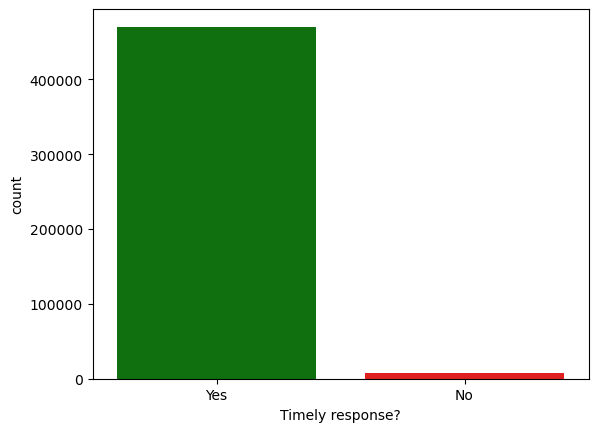

In [76]:
sns.countplot(x="Timely response?", data=bd_train, palette=['Green','Red'])

In [77]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp = pd.get_dummies(bd_train[col],prefix=col,drop_first=True)                                       #used one hot encoding
    bd_train = pd.concat([temp,bd_train],1)
    bd_train.drop([col],1,inplace=True)

In [78]:
#where(): Process elements depending on conditions with 0 and 1
bd_train['Consumer disputed?'] = np.where(bd_train['Consumer disputed?']=='Yes',1,0)  

In [79]:
bd_train.head()

,Timely response?_Yes,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,...,State_CA,State_FL,State_TX,State_NY,State_GA,State_NJ,State_PA,State_IL,State_VA,State_MD
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
p=bd_train['Consumer disputed?'].value_counts()                             #Return a Series containing counts of unique values 
p

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

In [81]:
perc=np.percentile(p,50)                                                                             #return the 40th percentile
perc

239210.5

In [82]:
bd_train.isnull().sum()

Timely response?_Yes                                            0
Company response to consumer_Closed with explanation            0
Company response to consumer_Closed with monetary relief        0
Company response to consumer_Closed with non-monetary relief    0
Company response to consumer_Closed with relief                 0
Company response to consumer_Closed without relief              0
Company response to consumer_Untimely response                  0
Submitted via_Fax                                               0
Submitted via_Phone                                             0
Submitted via_Postal mail                                       0
Submitted via_Referral                                          0
Submitted via_Web                                               0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_De

In [83]:
bd_train.shape

(478421, 52)

# CLEAN TEST DATA

In [84]:
bd_test = pd.read_csv("Consumer_Complaints_test_share.csv")

In [85]:
bd_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795
2,2012-03-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,2012-03-09,Closed without relief,Yes,32637
3,2016-01-07,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,2016-01-12,Closed with non-monetary relief,Yes,1731374
4,2013-08-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,2013-08-23,Closed with explanation,Yes,501487


In [86]:
bd_test.shape 

(119606, 17)

In [87]:
bd_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84854 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46546 non-null   object
 5   Consumer complaint narrative  18557 non-null   object
 6   Company public response       22776 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118681 non-null  object
 9   ZIP code                      118680 non-null  object
 10  Tags                          16871 non-null   object
 11  Consumer consent provided?    33864 non-null   object
 12  Submitted via                 119605 non-null  object
 13 

In [88]:
bd_test.columns                                                                            #return all columns from test dataset

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [89]:
df = bd_test.isnull().sum().sort_values(ascending=False)                #count of null values for specific columns in dataframe
percent_1 = bd_test.isnull().sum()/bd_test.isnull().count()*100
percent_2 = round(percent_1 , 2).sort_values(ascending=True)
missing_values = pd.concat([df , percent_2] , axis=1 , keys=['Total' , '%'])
missing_values

,Total,%
Tags,102735,85.89
Consumer complaint narrative,101049,84.48
Company public response,96830,80.96
Consumer consent provided?,85742,71.69
Sub-issue,73060,61.08
Sub-product,34752,29.06
ZIP code,926,0.77
State,925,0.77
Submitted via,1,0.00
Timely response?,0,0.00


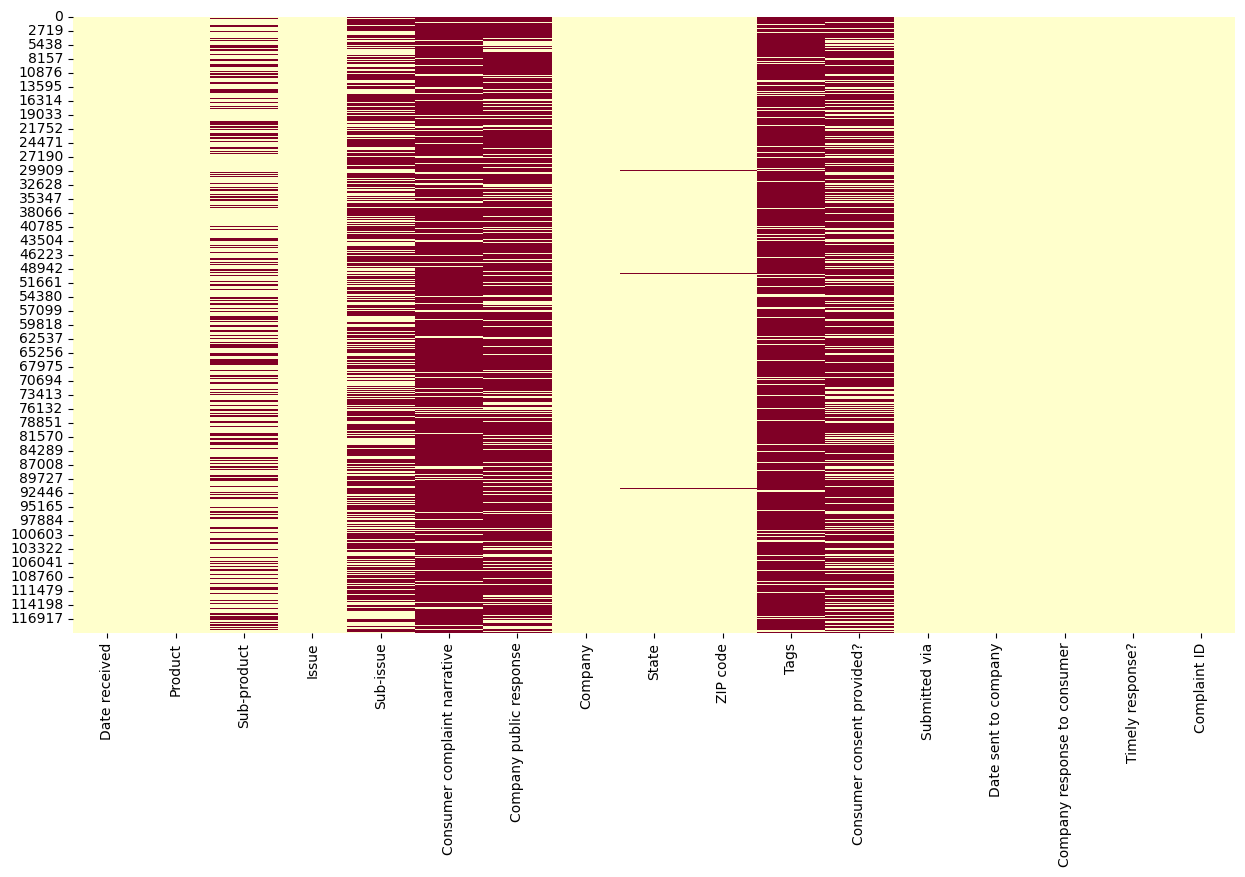

In [90]:
plt.figure(figsize=(15, 8))                                                                       #Missing Data - Visualization
sns.heatmap(bd_test.isnull(),cbar=False,cmap='YlOrRd')
plt.show()

<AxesSubplot:>

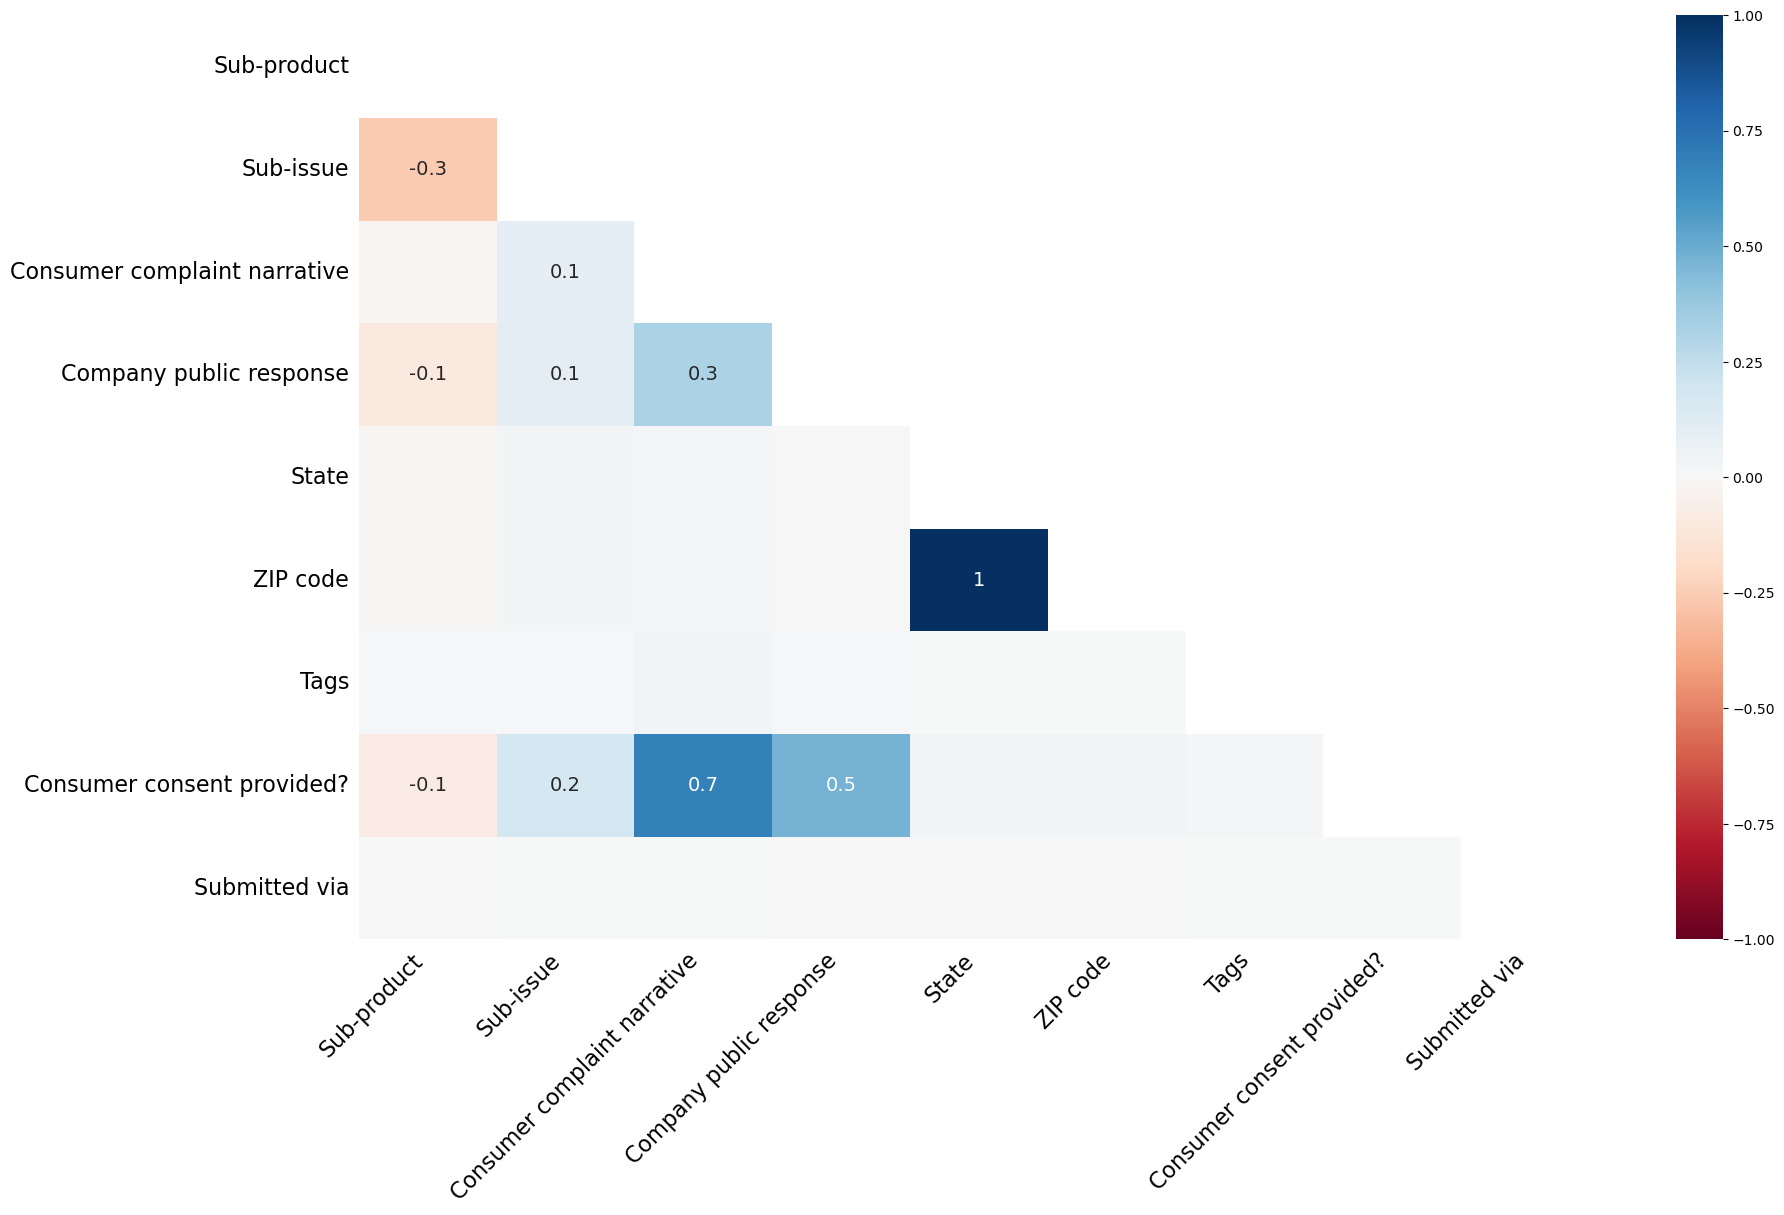

In [91]:
msno.heatmap(bd_test) 

In [92]:
bd_test['Consumer disputed?'] = np.nan

In [93]:
for col in ['Date sent to company','Date received']:
    bd_test[col] = pd.to_datetime(bd_test[col],infer_datetime_format=True)

In [94]:
bd_test.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34752
Issue                                0
Sub-issue                        73060
Consumer complaint narrative    101049
Company public response          96830
Company                              0
State                              925
ZIP code                           926
Tags                            102735
Consumer consent provided?       85742
Submitted via                        1
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
Consumer disputed?              119606
dtype: int64

In [95]:
bd_test['day_difffrom_Date'] = pd.to_numeric(bd_test['Date sent to company'] - bd_test['Date received'])

In [96]:
bd_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?,day_difffrom_Date
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956,NaN,-86400000000000
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795,NaN,0
2,2012-03-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,2012-03-09,Closed without relief,Yes,32637,NaN,86400000000000
3,2016-01-07,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,2016-01-12,Closed with non-monetary relief,Yes,1731374,NaN,432000000000000
4,2013-08-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,2013-08-23,Closed with explanation,Yes,501487,NaN,0


In [97]:
for col in ['Date sent to company','Date received']:
    bd_test.drop([col],axis=1,inplace=True)

In [98]:
bd_test.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?,day_difffrom_Date
0,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,Closed with explanation,Yes,675956,NaN,-86400000000000
1,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,Closed with explanation,Yes,1858795,NaN,0
2,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,Closed without relief,Yes,32637,NaN,86400000000000
3,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,Closed with non-monetary relief,Yes,1731374,NaN,432000000000000
4,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,Closed with explanation,Yes,501487,NaN,0


In [99]:
bd_test.dtypes

Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Company response to consumer     object
Timely response?                 object
Complaint ID                      int64
Consumer disputed?              float64
day_difffrom_Date                 int64
dtype: object

In [100]:
for col in ['Company public response','Consumer complaint narrative',
            'Consumer consent provided?','Sub-issue',"Sub-product",'Tags']:
    replace_name = col.replace(' ','_').replace('?','_').replace('-','_') + '_isNaN'   #replace the " "and "?" and "-" with "_"
    bd_test[replace_name] = np.where(pd.isnull(bd_test[col]),1,0)
    del bd_test[col] 

In [101]:
bd_test.head()

,Product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?,day_difffrom_Date,Company_public_response_isNaN,Consumer_complaint_narrative_isNaN,Consumer_consent_provided__isNaN,Sub_issue_isNaN,Sub_product_isNaN,Tags_isNaN
0,Bank account or service,Deposits and withdrawals,Bank of America,CA,95691,Web,Closed with explanation,Yes,675956,NaN,-86400000000000,1,1,1,1,0,1
1,Debt collection,Cont'd attempts collect debt not owed,"National Credit Adjusters, LLC",FL,32086,Web,Closed with explanation,Yes,1858795,NaN,0,1,1,0,0,0,1
2,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,94618,Web,Closed without relief,Yes,32637,NaN,86400000000000,1,1,1,1,0,1
3,Credit reporting,Unable to get credit report/credit score,"TransUnion Intermediate Holdings, Inc.",FL,33584,Postal mail,Closed with non-monetary relief,Yes,1731374,NaN,432000000000000,0,1,1,0,1,0
4,Mortgage,"Loan modification,collection,foreclosure",Bank of America,FL,33543,Web,Closed with explanation,Yes,501487,NaN,0,1,1,1,1,0,1


In [102]:
for col in bd_test.select_dtypes(['object']).columns:                                 #print object col & how many unique value
    print(col,":",bd_test[col].nunique())

Product : 12
Issue : 94
Company : 2237
State : 62
ZIP code : 17784
Submitted via : 6
Company response to consumer : 7
Timely response? : 2


In [103]:
for col in ['ZIP code','Company']:                         #drop ZIP code,Company col lot's of null value is present in the col
    bd_test.drop([col],axis=1,inplace=True)

In [104]:
ise = bd_test['Issue'].value_counts()
for val in ise.axes[0][0:10]:                                                                              #rearranging the data
    replace_name = 'Issue_'+val.replace(',','_').replace(' ','_')                                  #replace "," and " " with "_"
    bd_test[replace_name] = np.where(bd_test['Issue']==val,1,0)                                #apply where cond and convert 1,0

del bd_test['Issue']                                                                             #delete issue objects in Python

In [105]:
ise = bd_test['State'].value_counts()
for val in ise.axes[0][0:10]:                                                                              #rearranging the data
    replace_name = 'State_'+val.replace(',','_').replace(' ','_')                                  #replace "," and " " with "_"
    bd_test[replace_name] = np.where(bd_test['State']==val,1,0)                                #apply where cond and convert 1,0

del bd_test['State']                                                                             #delete State objects in Python

In [106]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp = pd.get_dummies(bd_test[col],prefix=col,drop_first=True)                                        #used one hot encoding
    bd_test = pd.concat([temp,bd_test],1)
    bd_test.drop([col],1,inplace=True)

In [107]:
bd_test['Consumer disputed?'] = np.where(bd_test['Consumer disputed?']=='Yes',1,0) 
#where(): Process elements depending on conditions with 0 and 1

In [108]:
bd_test.head()

,Timely response?_Yes,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,...,State_CA,State_FL,State_TX,State_NY,State_GA,State_NJ,State_PA,State_IL,State_VA,State_OH
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [109]:
p=bd_test['Consumer disputed?'].value_counts()                              #Return a Series containing counts of unique values 
p

0    119606
Name: Consumer disputed?, dtype: int64

In [110]:
perc=np.percentile(p,50)                                                                             #return the 40th percentile
perc

119606.0

In [111]:
bd_test.isnull().sum()

Timely response?_Yes                                            0
Company response to consumer_Closed with explanation            0
Company response to consumer_Closed with monetary relief        0
Company response to consumer_Closed with non-monetary relief    0
Company response to consumer_Closed with relief                 0
Company response to consumer_Closed without relief              0
Company response to consumer_Untimely response                  0
Submitted via_Fax                                               0
Submitted via_Phone                                             0
Submitted via_Postal mail                                       0
Submitted via_Referral                                          0
Submitted via_Web                                               0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_De

In [112]:
bd_test.shape

(119606, 52)

In [113]:
bd_train.shape

(478421, 52)

In [114]:
# separate dependent & independent features
x = bd_train.drop(['Consumer disputed?'],1)
y = bd_train['Consumer disputed?']

x.shape, y.shape

((478421, 51), (478421,))

# Splitting Dataset & Model Building

In [115]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=124)

In [116]:
print (x.shape)                                                                         #Dimensions of each type after splitting
print (y.shape)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(478421, 51)
(478421,)
(358815, 51)
(119606, 51)
(358815,)
(119606,)


In [117]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [118]:
y_pred=logreg.predict(xtest)

In [119]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
cm

array([[94378,     0],
       [25228,     0]], dtype=int64)

([<matplotlib.axis.YTick at 0x1fb03cd7970>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

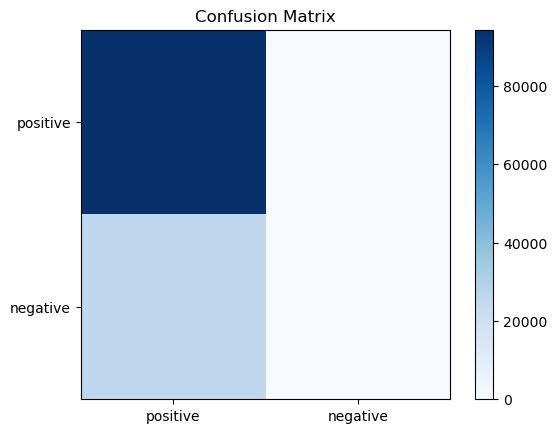

In [120]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)                                  #creating a plot of a confusion matrix
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

In [121]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,y_pred)
score

0.789074126716051

# Cross validate your model

In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [123]:
score

array([0.78797316, 0.78798963, 0.78798963, 0.78798963, 0.78798963,
       0.78798963, 0.78798963, 0.78798963, 0.78798963, 0.78798963])

In [124]:
score.mean()

0.7879879855082098


Hyperparameter Tuning


Tuning Strategies

1) Grid Search 2) Random Search

# DecisionTreeClassifier

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [126]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]}

In [127]:
clf=DecisionTreeClassifier()
random_search=RandomizedSearchCV(clf,cv=10,  
                                 param_distributions=params,   
                                 scoring='roc_auc',
                                 n_iter=20,n_jobs=-1,verbose=20) 

In [128]:
random_search.fit(xtrain,ytrain) 

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   scoring='roc_auc', verbose=20)

In [129]:
def report(results, n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']== i)
        
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean Validation Score: {0:.8f} (std:{1:.3f})'.format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [130]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean Validation Score: 0.62730755 (std:0.003)
Parameters:{'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 2
Mean Validation Score: 0.62689387 (std:0.003)
Parameters:{'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}

Model with rank: 3
Mean Validation Score: 0.62226934 (std:0.003)
Parameters:{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 4
Mean Validation Score: 0.62166484 (std:0.002)
Parameters:{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 5
Mean Validation Score: 0.62088966 (std:0.003)
Parameters:{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini', 'class_weight': None}



In [131]:

random_search.best_estimator_    

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=15)

In [132]:
dtree=random_search.best_estimator_

In [133]:
dtree.fit(xtrain,ytrain)   #Fit a model on the train data.

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=15)

In [134]:
dtree.predict_proba(xtrain)                                                           #Predict probabilities for the train data.

array([[0.68725781, 0.31274219],
       [0.34582698, 0.65417302],
       [0.50752368, 0.49247632],
       ...,
       [0.48454225, 0.51545775],
       [0.46052044, 0.53947956],
       [0.54106339, 0.45893661]])

In [135]:
dtree.classes_

array([0, 1])

In [136]:
train_score=dtree.predict_proba(xtrain)[:,1] 
train_score

array([0.31274219, 0.65417302, 0.49247632, ..., 0.51545775, 0.53947956,
       0.45893661])

In [137]:
actual = ytrain

In [138]:
cutoffs = np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [139]:
conf_mat =[]
for cutoff in cutoffs:
    
    predicted = (train_score > cutoff).astype(int)
    
    True_Positive = ((actual==1)&(predicted==1)).sum()
    False_Positive= ((actual==0) &(predicted==1)).sum()
    True_Negative = ((actual==0)&(predicted==0)).sum()
    False_Negative = ((actual==1)&(predicted==0)).sum() 
    
    P = True_Positive+False_Negative
    N = True_Negative+False_Positive
    
    KS = (True_Positive/P)-(False_Positive/N)  
    
    conf_mat.append(KS)

In [140]:
mycutoff = cutoffs[conf_mat==max(conf_mat)][0]
mycutoff

0.5

In [141]:
test_score=dtree.predict_proba(xtest)[:,1]
test_score

array([0.49479978, 0.3797062 , 0.58196698, ..., 0.44806634, 0.58196698,
       0.46554822])

In [142]:
test_classes = (test_score>mycutoff).astype(int)
test_classes

array([0, 0, 1, ..., 0, 1, 0])

The model selection metric for the bi-multi class classification problem is the AUC-ROC curve. A probability curve for various classes is called a ROC. In terms of the expected probability, ROC indicates how well the model separates the specified classes.

In [143]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(ytest,test_classes)
print('AUC: %.2f' % score)

AUC: 0.59


In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [145]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [146]:
fpr, tpr, thresholds = roc_curve(ytest, test_classes)

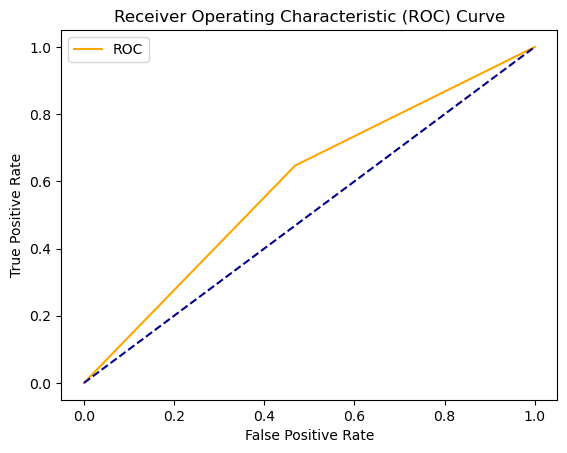

In [147]:
plot_roc_curve(fpr, tpr)

The ROC curve is a graphical representation of the performance of a binary classifier at various thresholds. It plots the true positive rate (TPR) on the y-axis (also known as sensitivity or recall) against the false positive rate (FPR) on the x-axis.
The orange line represents the ROC curve for a binary classifier, while the dashed blue line represents the ROC curve for a random classifier. The point where the two curves intersect (top-left corner) represents the optimal point where the classifier achieves both high true positive rate and low false positive rate.

# Boosting Machines

In [148]:
base_clf=DecisionTreeClassifier(max_leaf_nodes=4,class_weight='balanced')

In [149]:
from sklearn.ensemble import AdaBoostClassifier
adb_params={'n_estimators':[50,100,500],
           'learning_rate': [0.01,.1,1]
           }
adb=AdaBoostClassifier(base_estimator=base_clf)

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
complete_search=GridSearchCV(adb,scoring='roc_auc',param_grid=adb_params,cv=5,n_jobs=-1,verbose=20)

In [152]:
complete_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_leaf_nodes=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 500]},
             scoring='roc_auc', verbose=20)

In [153]:
def report(results,n_top=5):
    for i in range(1,n_top+1):
        cands = np.flatnonzero(results['rank_test_score']==i)
        for c in cands:
            print(f"Model with rank {i}")
            print(f"Mean validation score:{results['mean_test_score'][c]} (std:{results['std_test_score'][c]})")
            print(f"Parameters:{results['params'][c]}")
            print(' ')
                  

In [154]:
report(complete_search.cv_results_,5)

Model with rank 1
Mean validation score:0.6346134231279539 (std:0.0015832556097727362)
Parameters:{'learning_rate': 0.1, 'n_estimators': 500}
 
Model with rank 2
Mean validation score:0.6325589735659374 (std:0.0014844630722925531)
Parameters:{'learning_rate': 1, 'n_estimators': 100}
 
Model with rank 3
Mean validation score:0.6323462928202866 (std:0.0014276298758638276)
Parameters:{'learning_rate': 1, 'n_estimators': 50}
 
Model with rank 4
Mean validation score:0.6277298271599098 (std:0.0019581450514822353)
Parameters:{'learning_rate': 0.1, 'n_estimators': 100}
 
Model with rank 5
Mean validation score:0.6265861991971399 (std:0.002368300636377635)
Parameters:{'learning_rate': 1, 'n_estimators': 500}
 


In [155]:
complete_search.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_leaf_nodes=4),
                   learning_rate=0.1, n_estimators=500)

In [156]:
adb_best = complete_search.best_estimator_

In [157]:
#Fit a model on the train data.
adb_best.fit(xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_leaf_nodes=4),
                   learning_rate=0.1, n_estimators=500)

In [158]:
pred = adb_best.predict_proba(xtest)[:,1]

In [159]:
adb_best.classes_

array([0, 1])

In [160]:
from sklearn.metrics import roc_auc_score

In [161]:
score=roc_auc_score(ytest,pred)
print('AUC: %.2f' % score)

AUC: 0.63


In [162]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

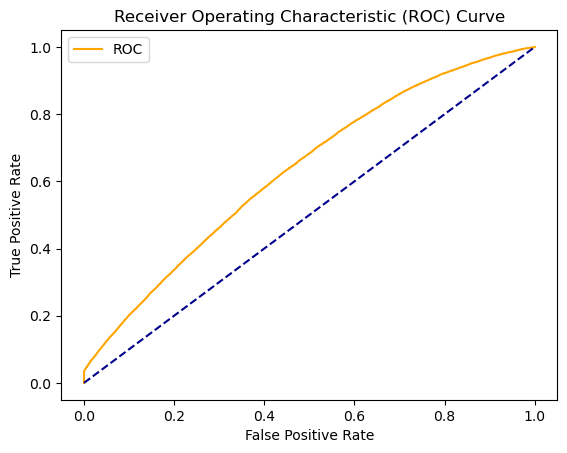

In [163]:
plot_roc_curve(fpr, tpr)

In [164]:
submission=pd.DataFrame(list(zip(bd_test['Complaint ID'],list(test_classes))),
                       columns=['Complaint ID','Consumer disputed?'])

In [166]:
submission['Consumer disputed?'] = submission['Consumer disputed?'].replace({0: 'No', 1: 'Yes'})

In [170]:
submission['Consumer disputed?'].value_counts()

Yes    60538
No     59068
Name: Consumer disputed?, dtype: int64

In [167]:
submission.to_csv('hariprasad_submission.csv', index=False)

In [168]:
bd_train['Consumer disputed?'].value_counts()

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

In [169]:
submission.head().replace({0: 'No', 1: 'Yes'})

,Complaint ID,Consumer disputed?
0,675956,No
1,1858795,No
2,32637,Yes
3,1731374,No
4,501487,Yes
